## Implementation
This kernel uses multiple classification algorithms as below
<ul>
    <li>Multi-layer Perceptron classifier (MLP) - Neural Networks</li>
    <li>KNeighborsClassifier - Instance-Based Learning</li>
    <li>AdaBoostClassifier - Ensemble Learning</li>
    <li>BaggingClassifier - Ensemble Learning</li>
    <li>GradientBoostingClassifier - Ensemble Learning</li>
    <li>RandomForestClassifier - Ensemble Learning</li>
</ul>
    
Also this kernel does lot of indepth EDA like 
<ul>
    <li>univalirate analysis</li>
    <li>bivariate analysis</li>
    <li>correlation analysis</li>
</ul>

This kernel utilize the below methods for evaluation of model accuracy
<ul>
    <li>auc</li>
    <li>classification report</li>
    <li>confusion matrix</li>
</ul>

## General Library Imports

In [4]:
#  Install the Matplotlib library using pip as the Python package manager.
!pip install matplotlib

In [5]:
#  Install the Tensorflow library using pip as the Python package manager.
!pip install tensorflow

In [6]:
# Import the necessary modules
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# ChatGPT - DL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# libraries for models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

# Libraries for Metrics evaluation
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, RocCurveDisplay

## Data loading

In [7]:
project_data = pd.read_csv("./dataset/Employee Analysis Attrition Report/HR Employee Attrition.csv")

##  Analysis of the Data

In [8]:
project_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
project_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
project_data.shape

(1470, 35)

In [12]:
project_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
project_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Eploratory Data Analysis

### uivariate Analysis

In [14]:
numeric_columns = [column for column in project_data.columns if project_data[column].dtype == 'int64']
print(numeric_columns)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


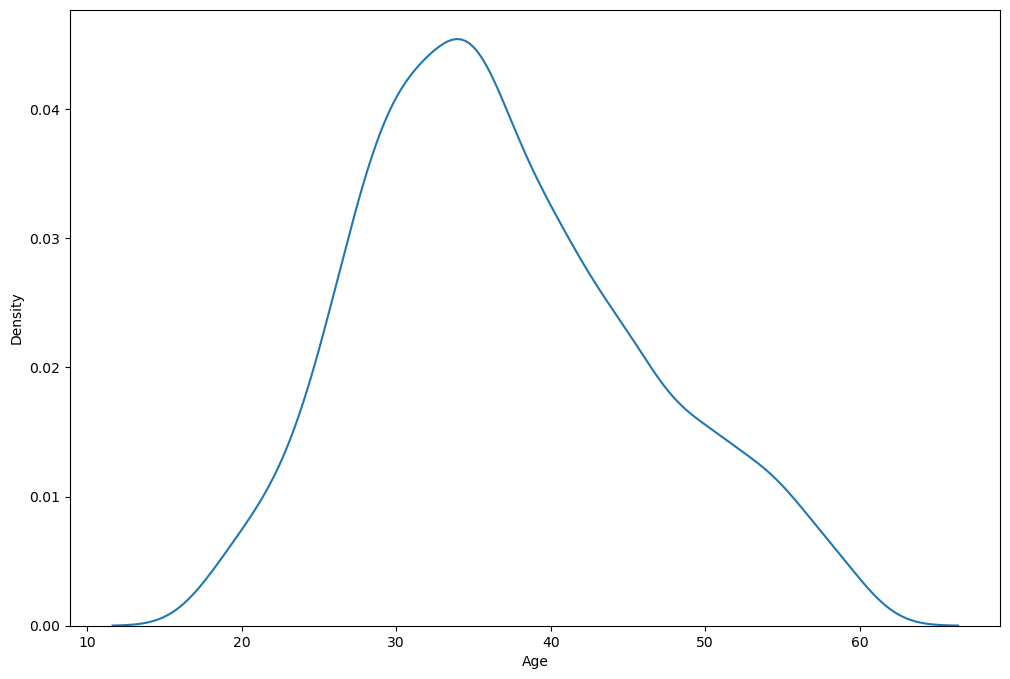

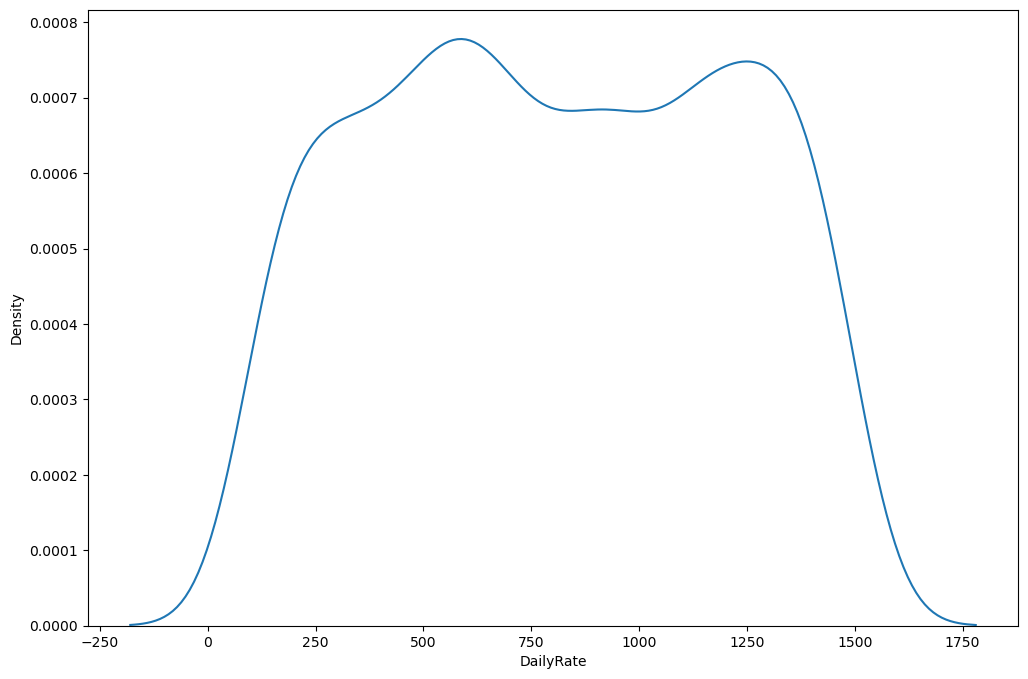

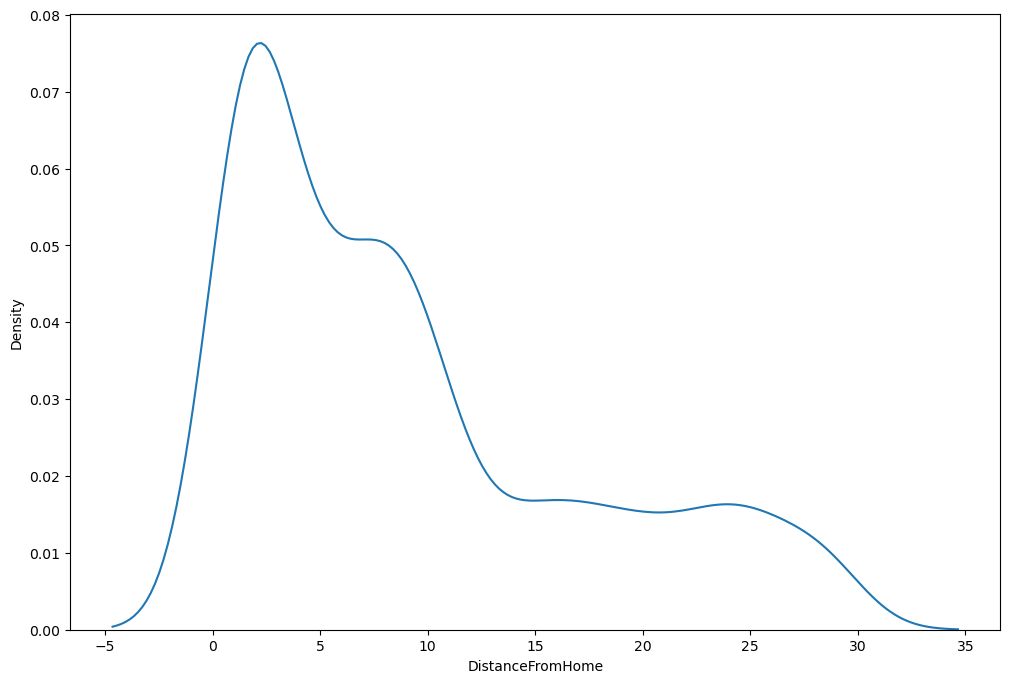

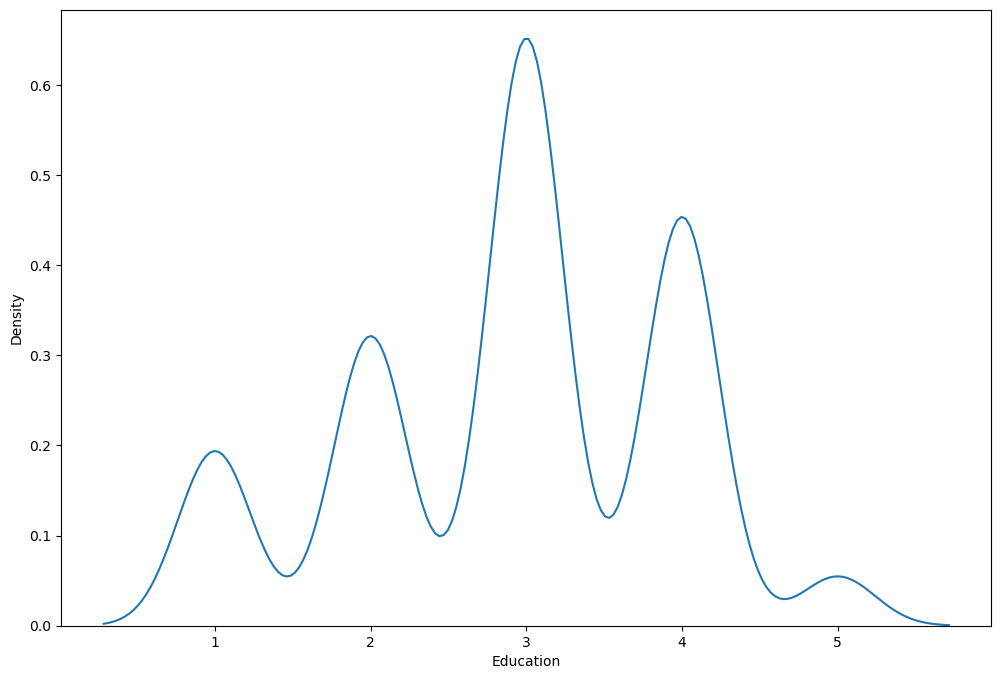

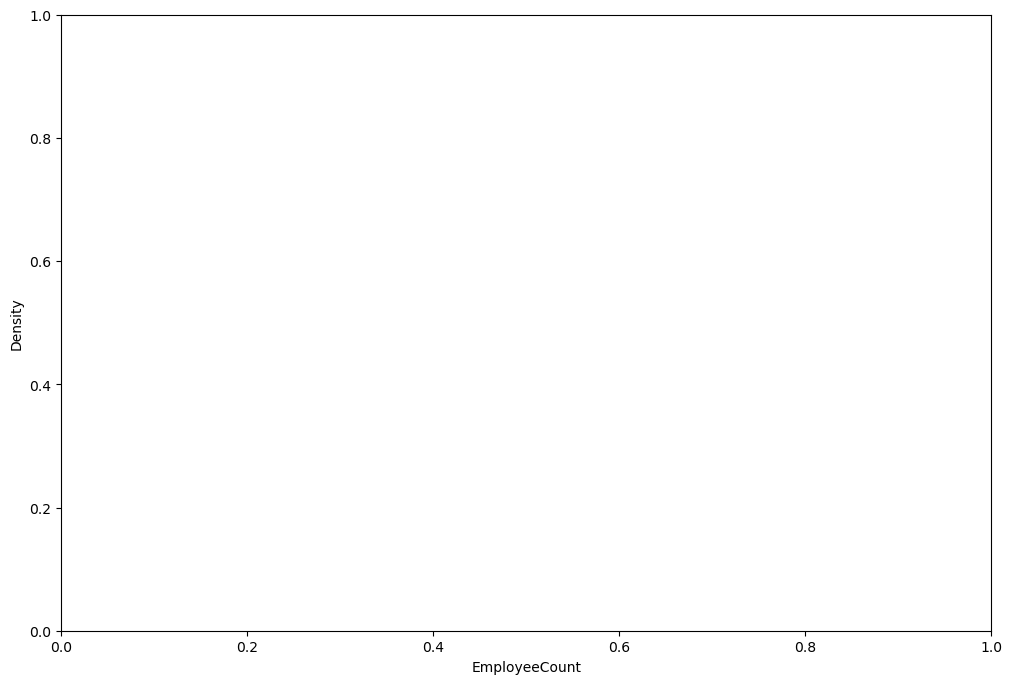

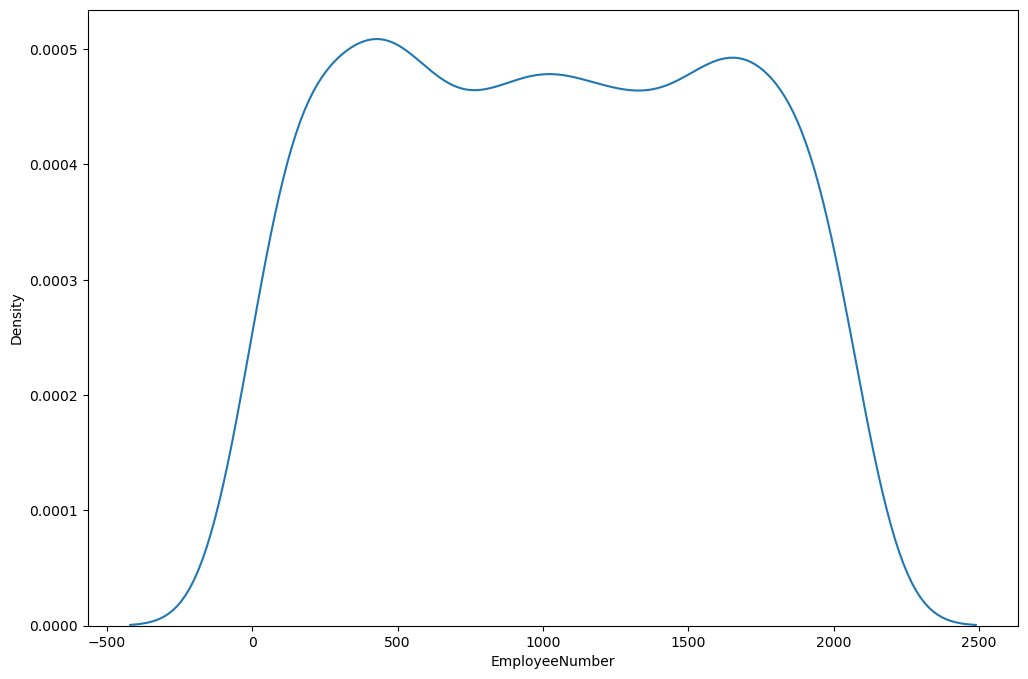

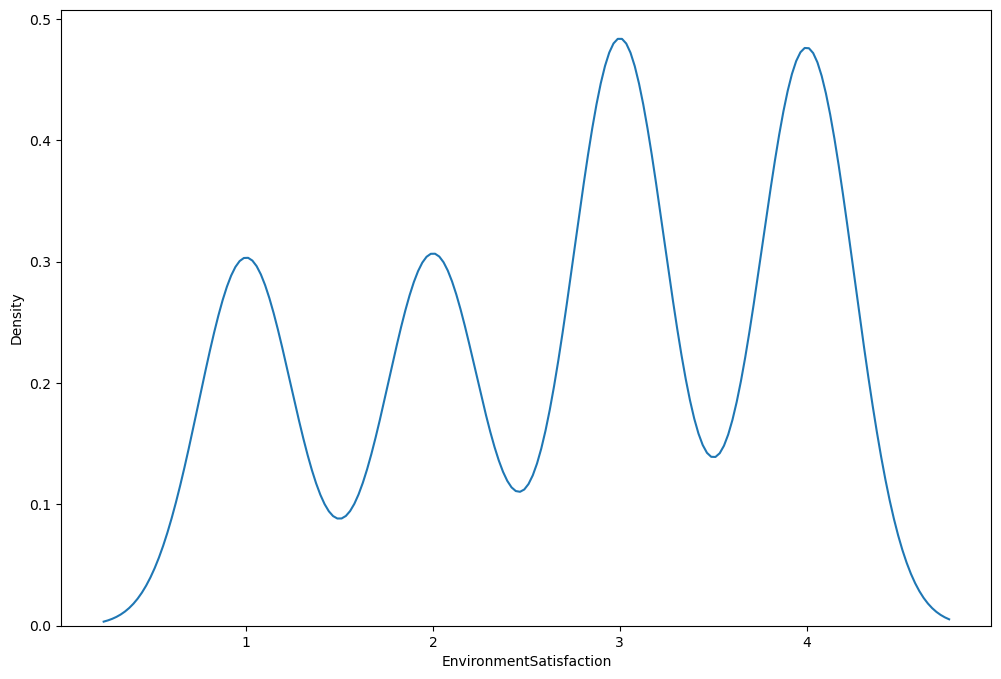

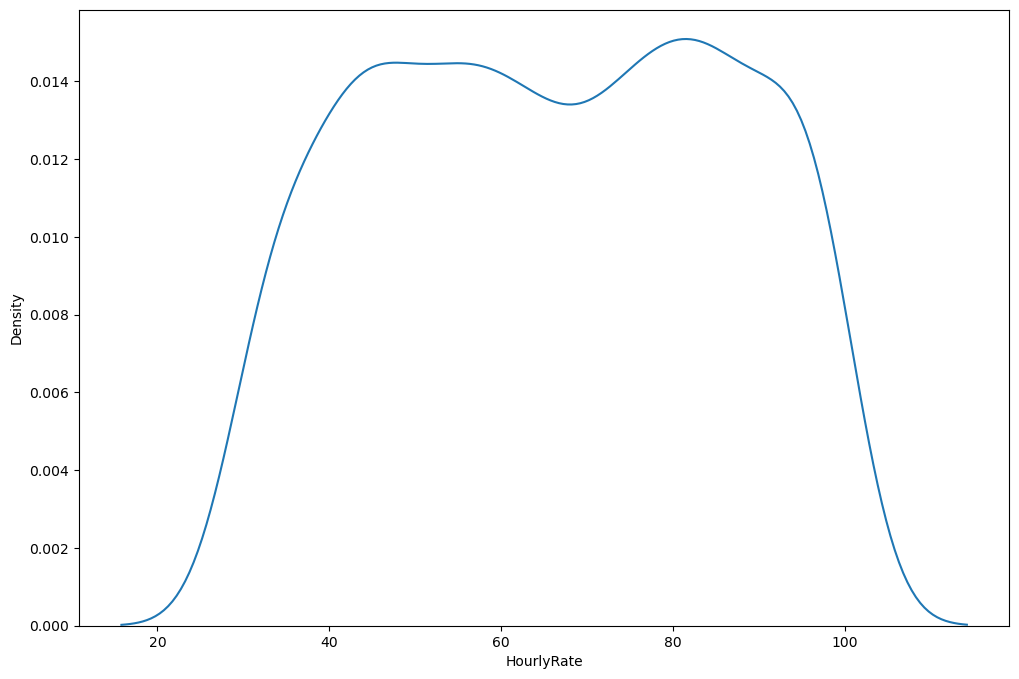

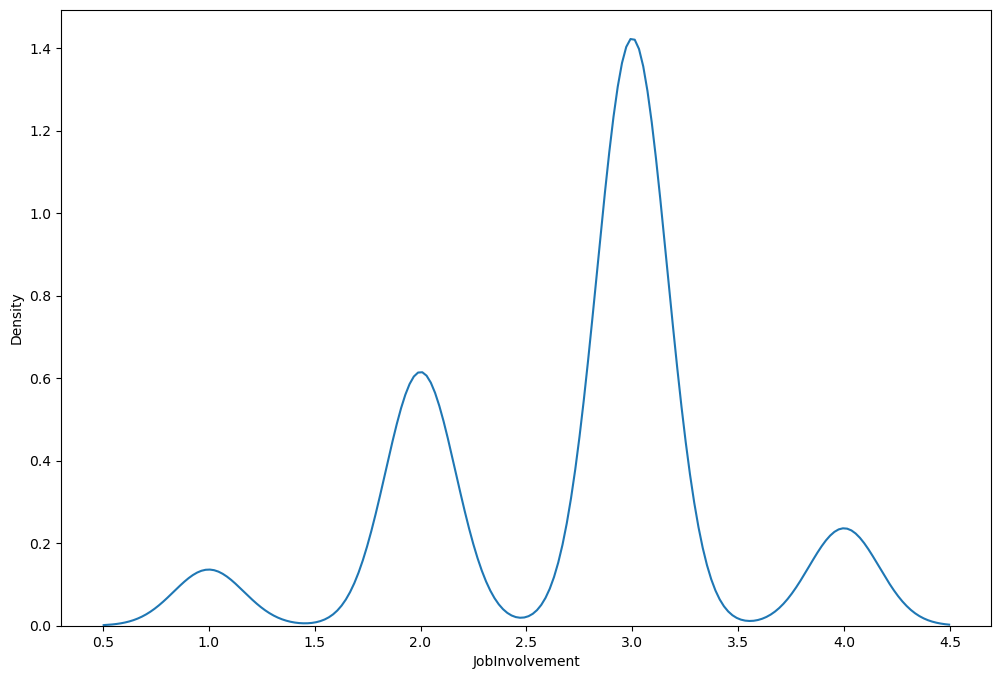

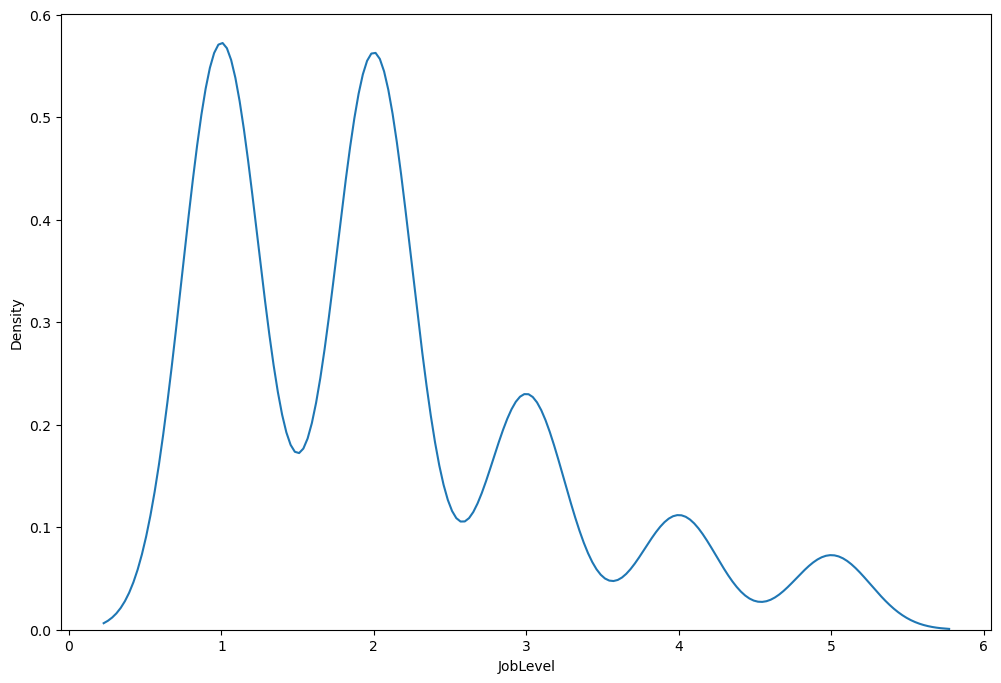

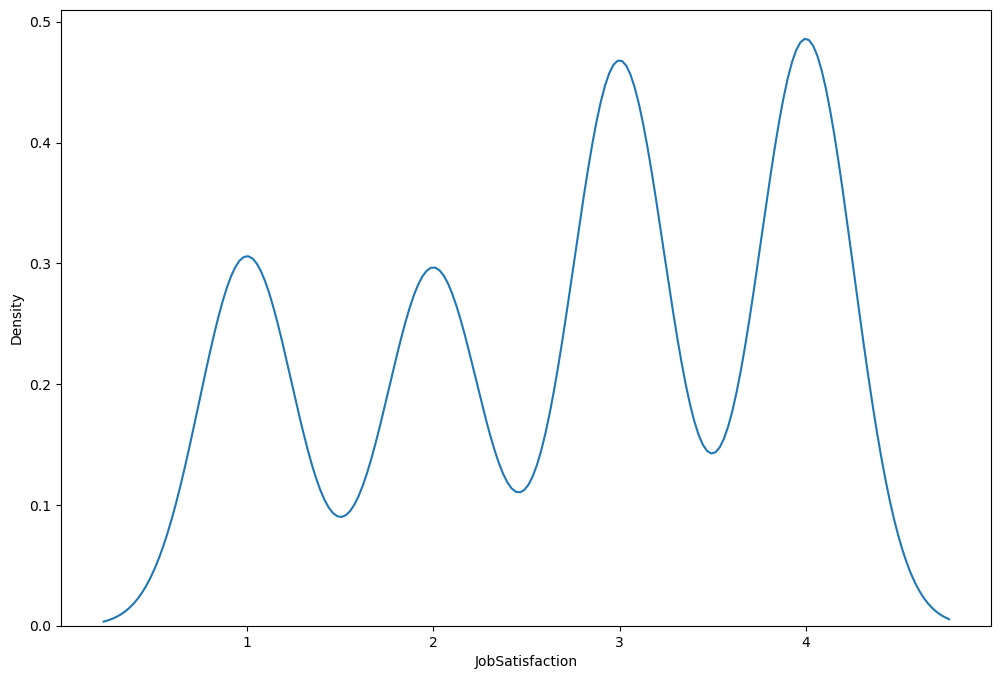

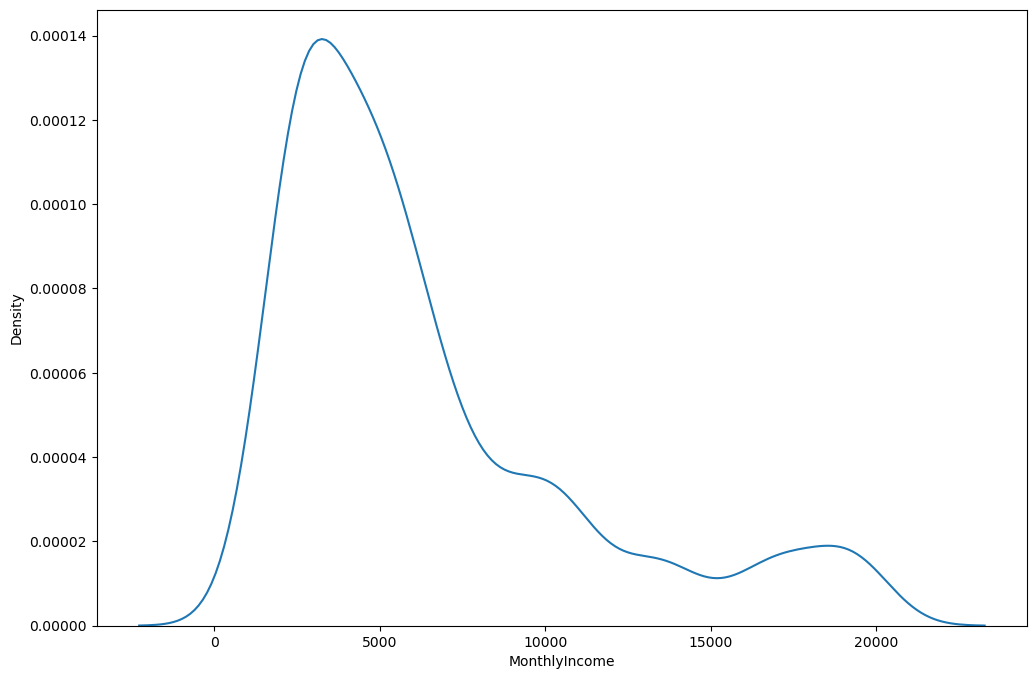

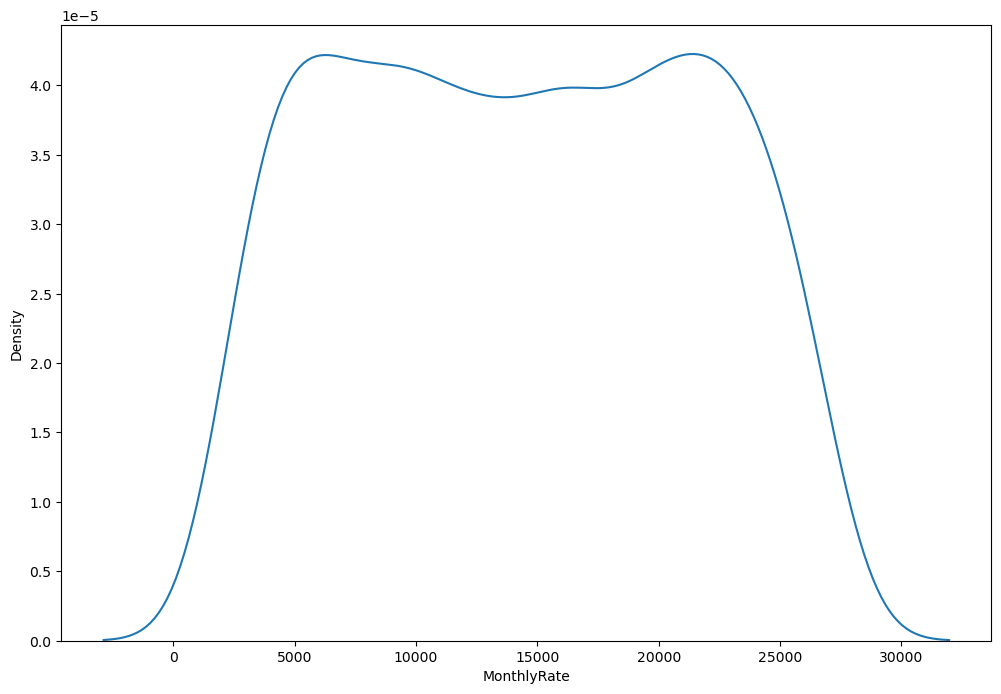

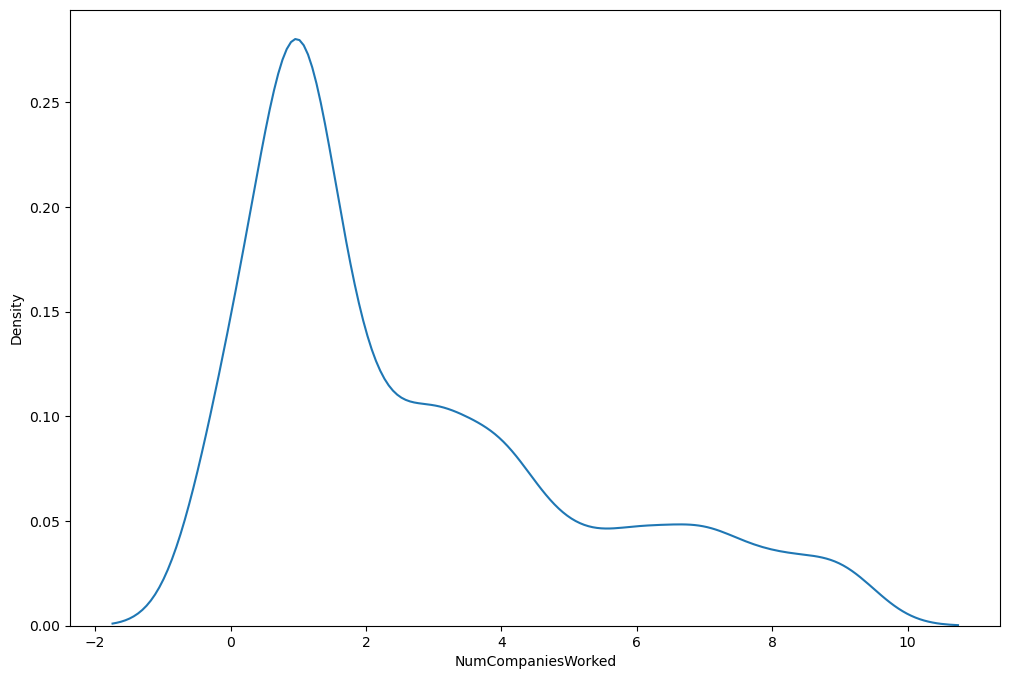

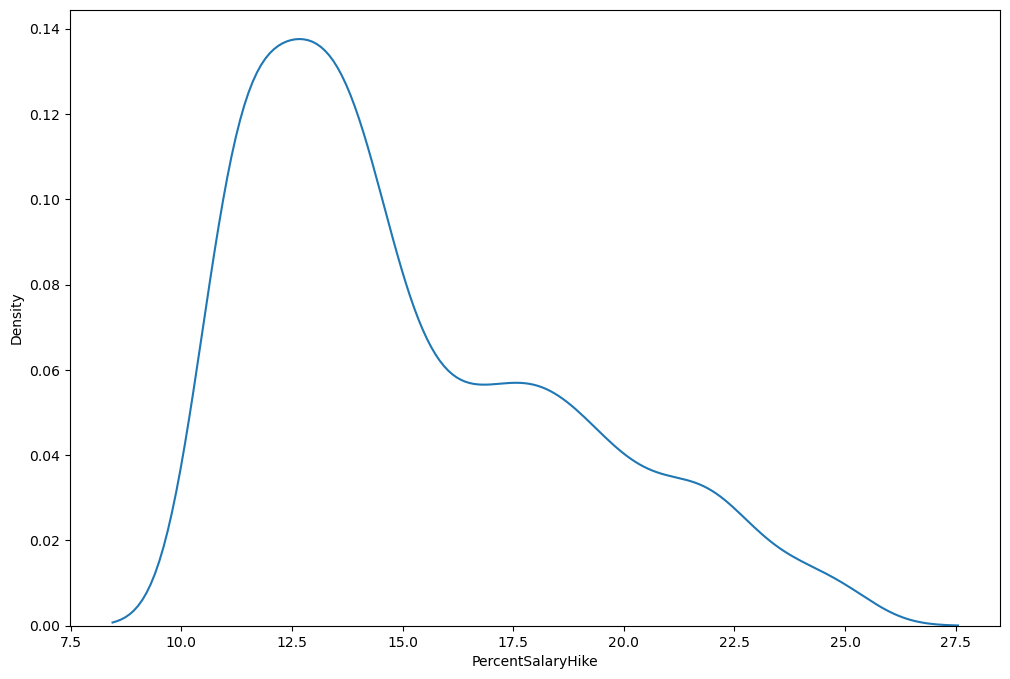

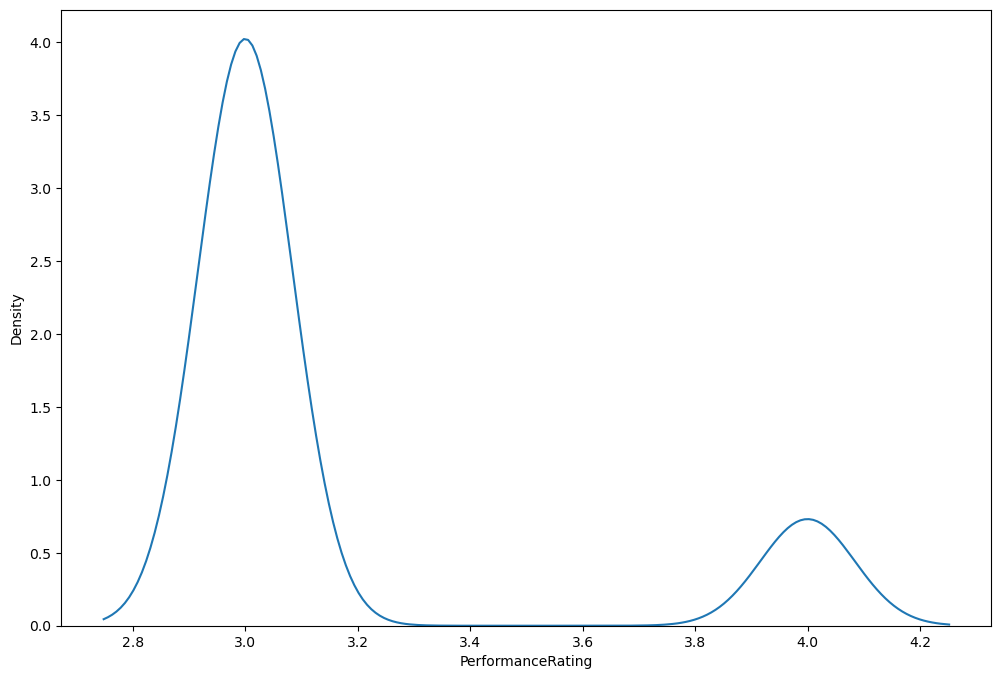

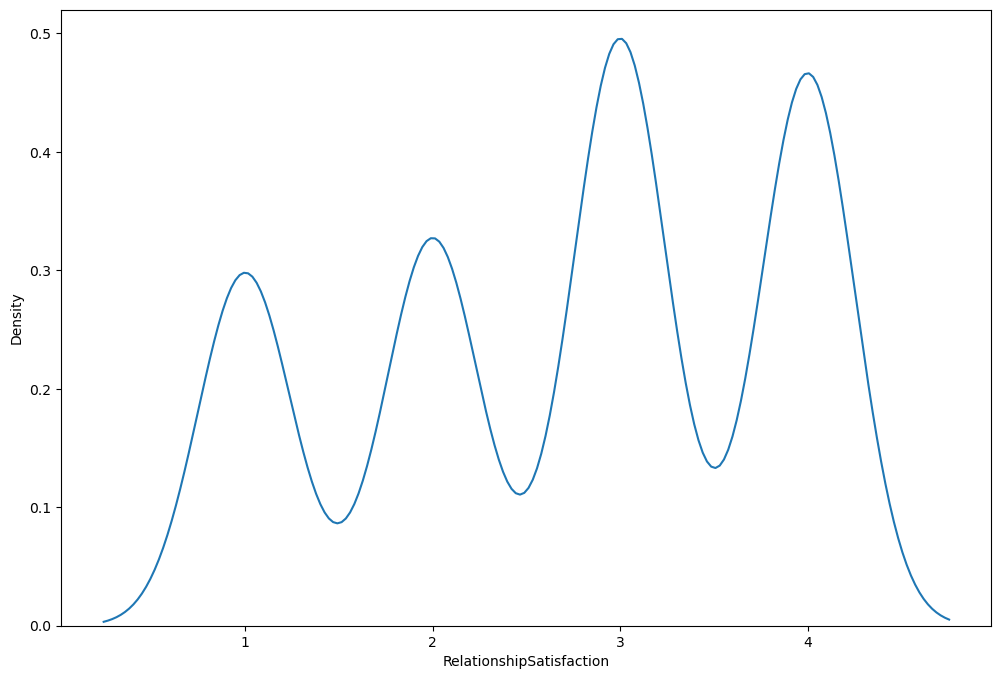

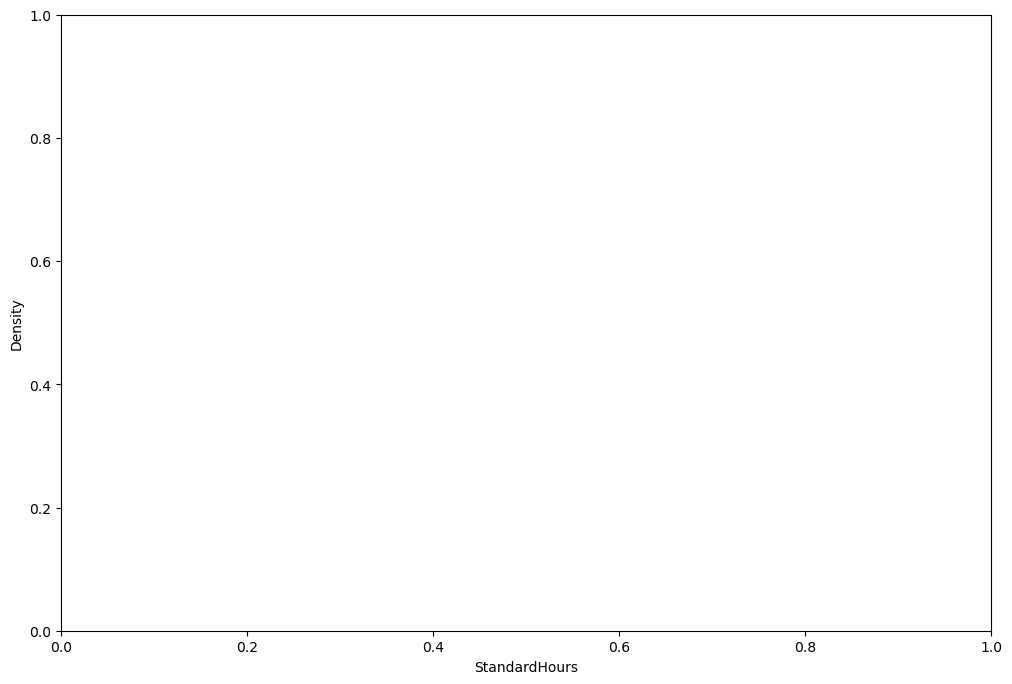

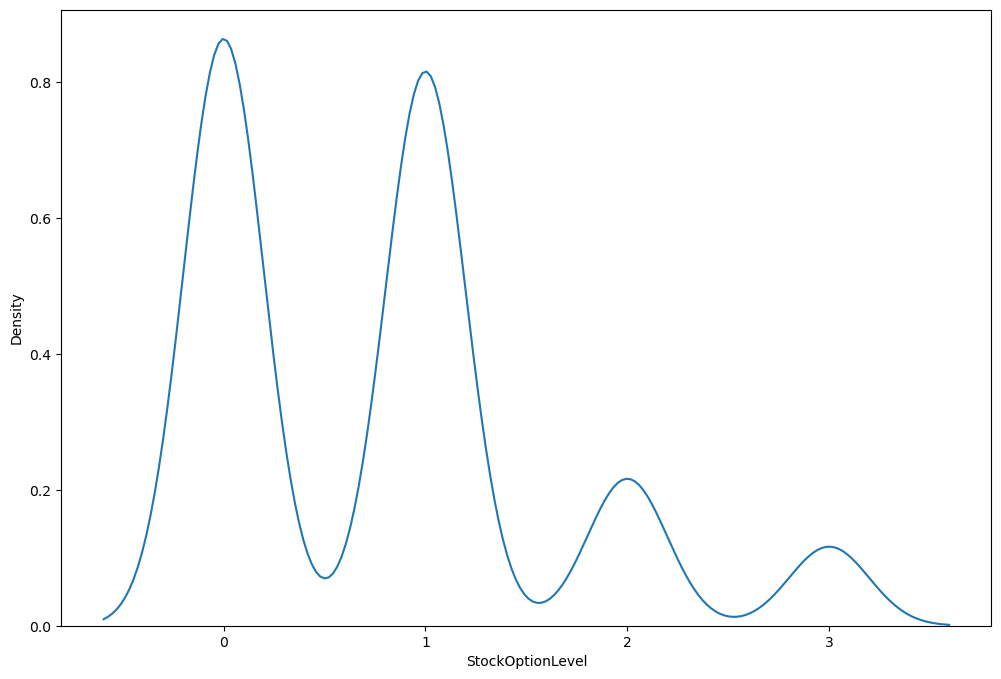

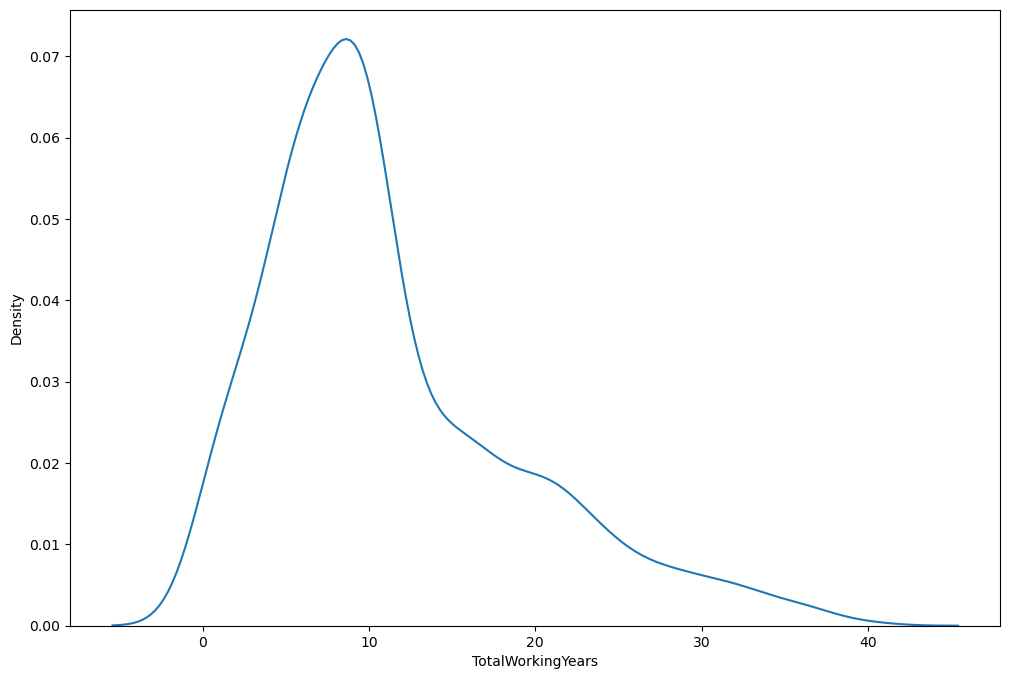

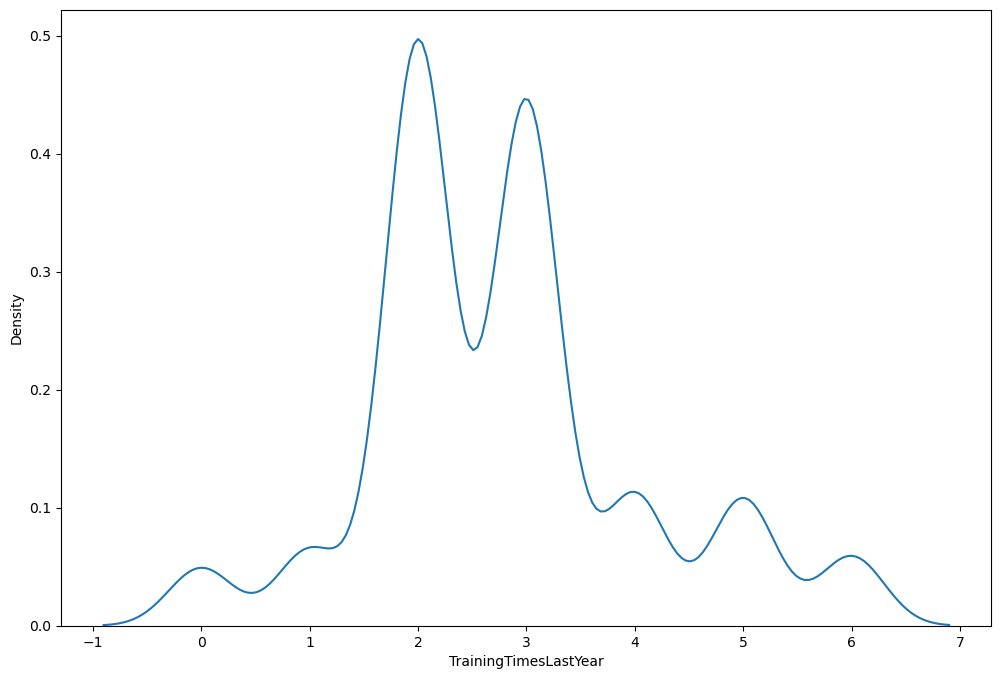

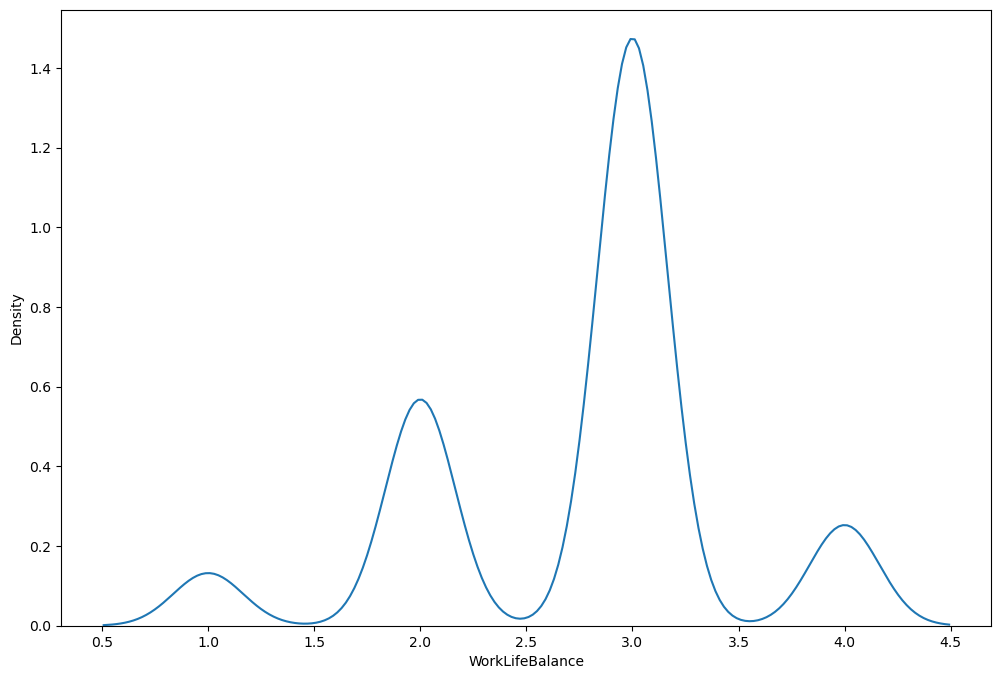

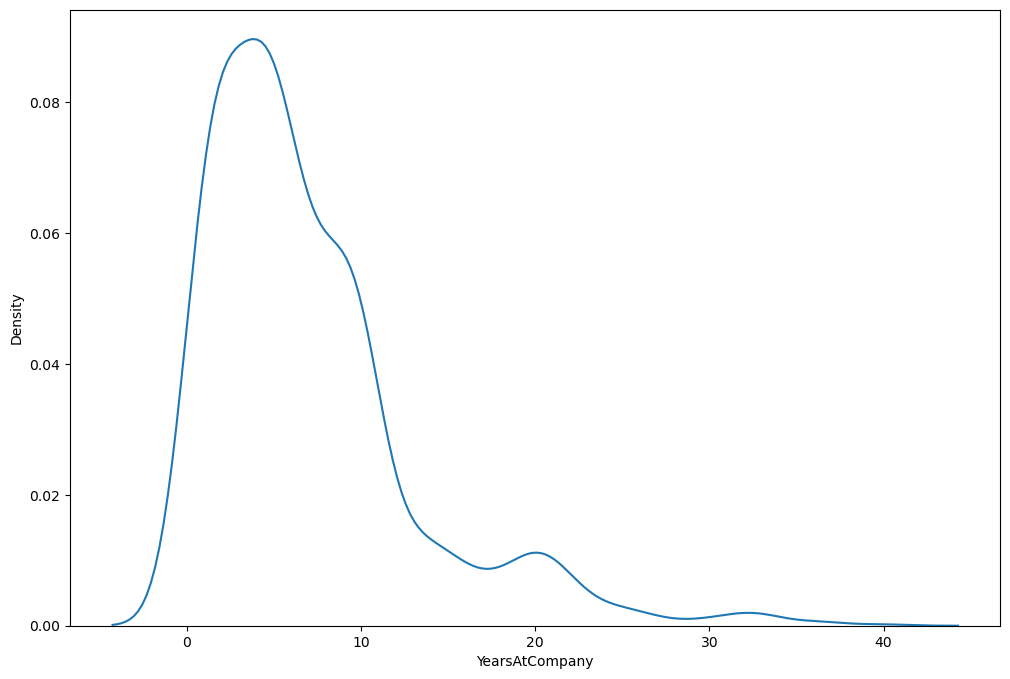

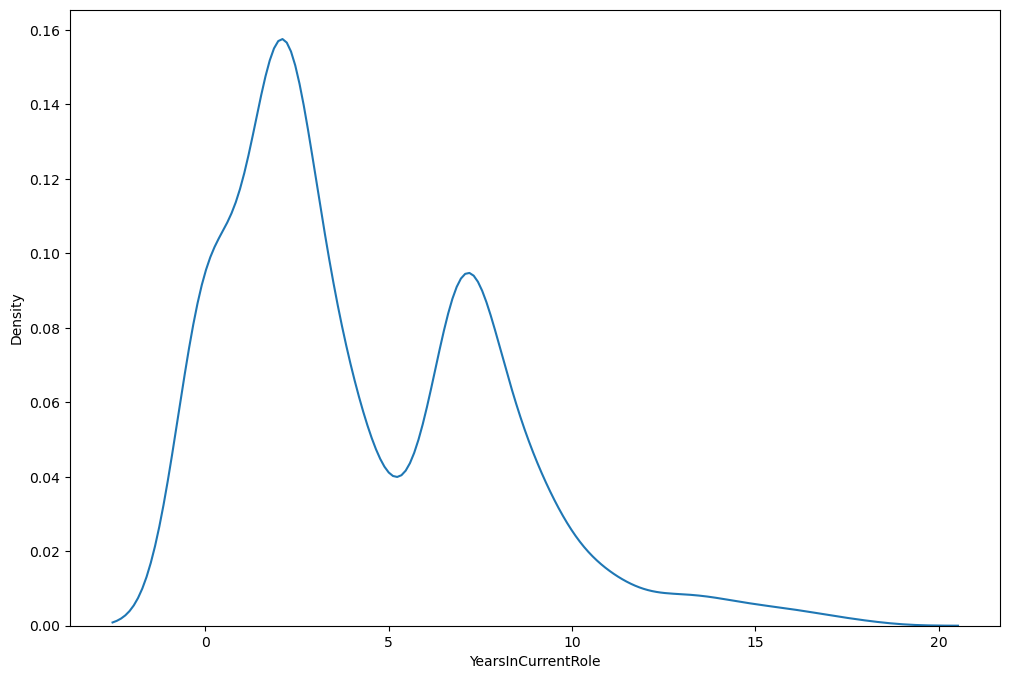

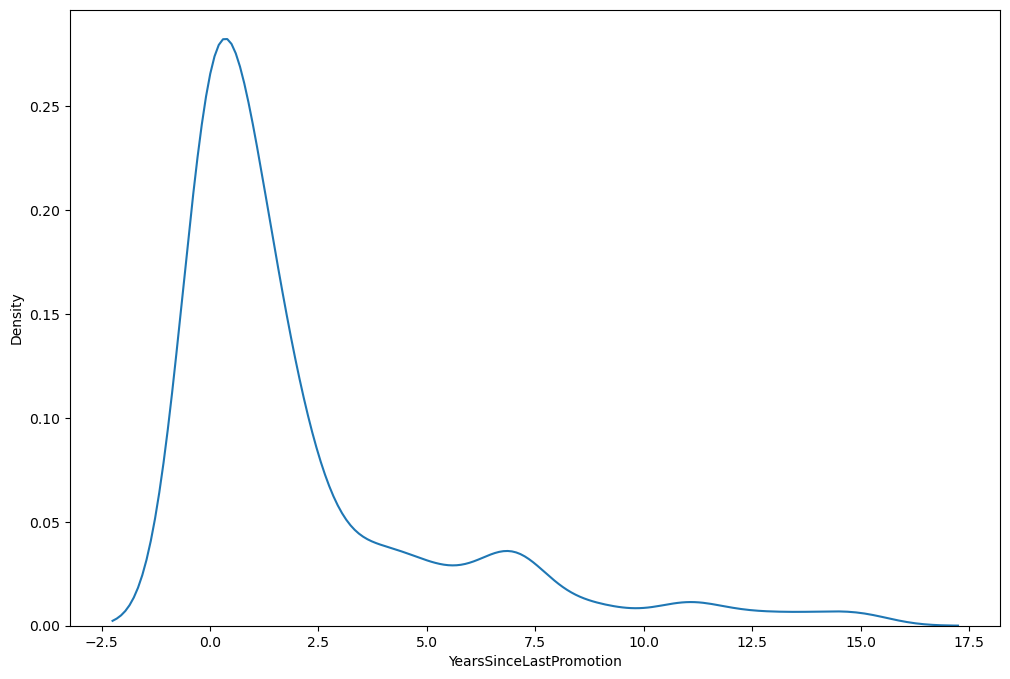

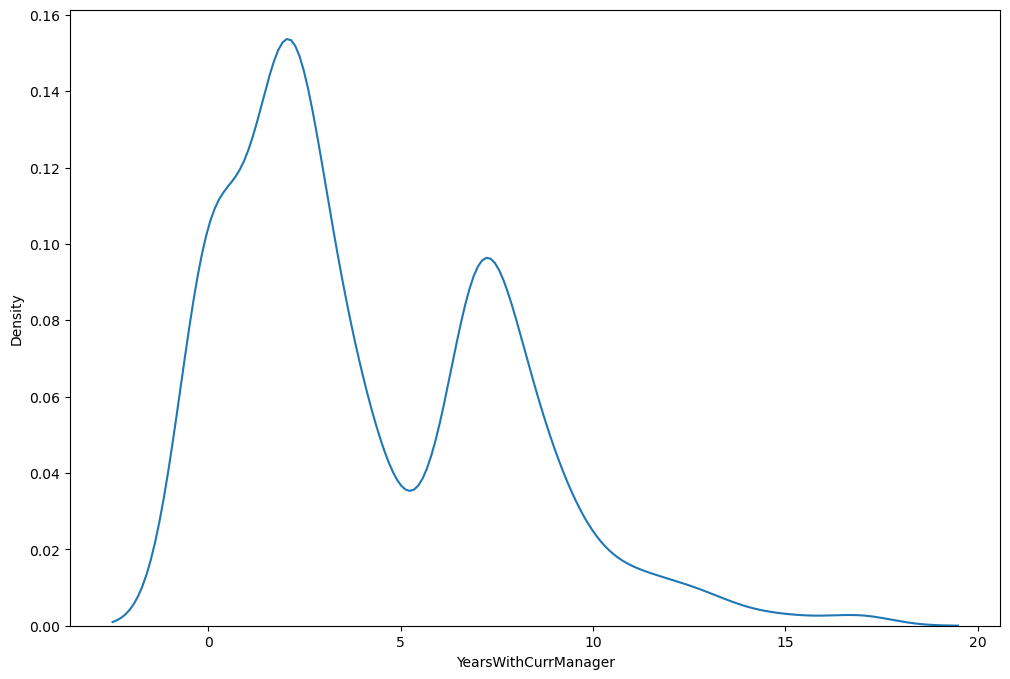

In [15]:
for column in numeric_columns:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=project_data, x=column, palette="crest")
    plt.show()

In [16]:
categorical_columns = [column for column in project_data.columns if project_data[column].dtype != 'int64']
print(categorical_columns)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


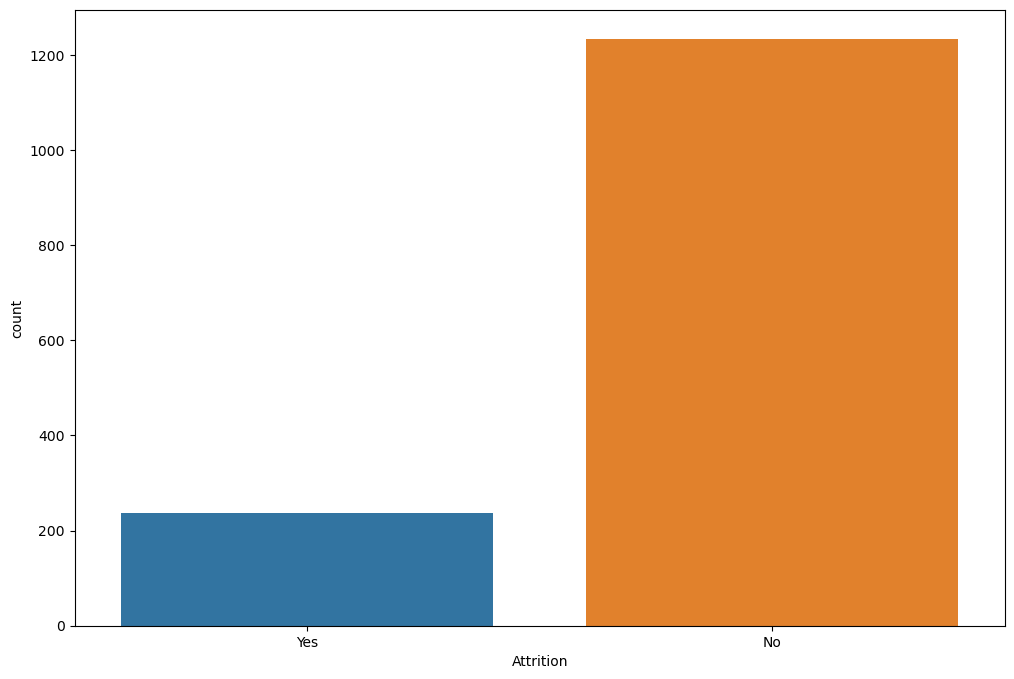

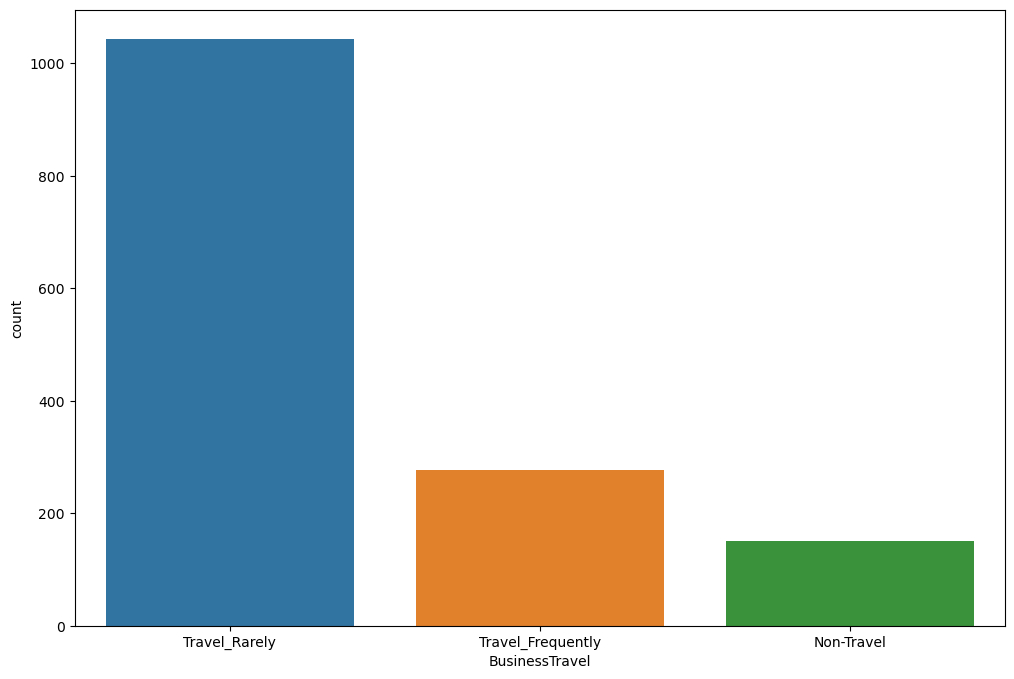

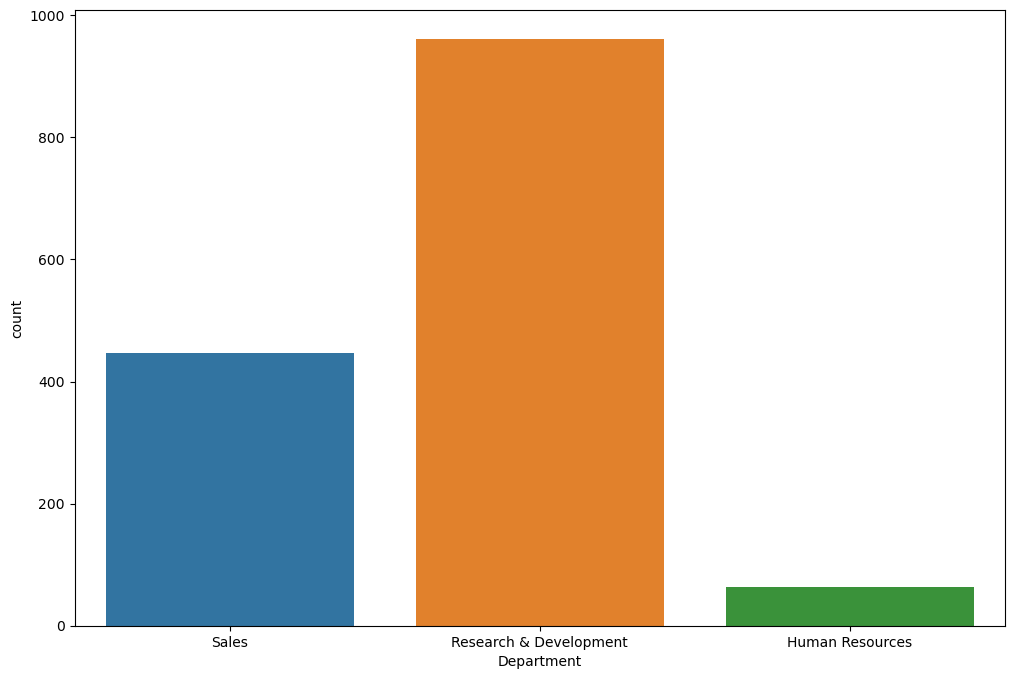

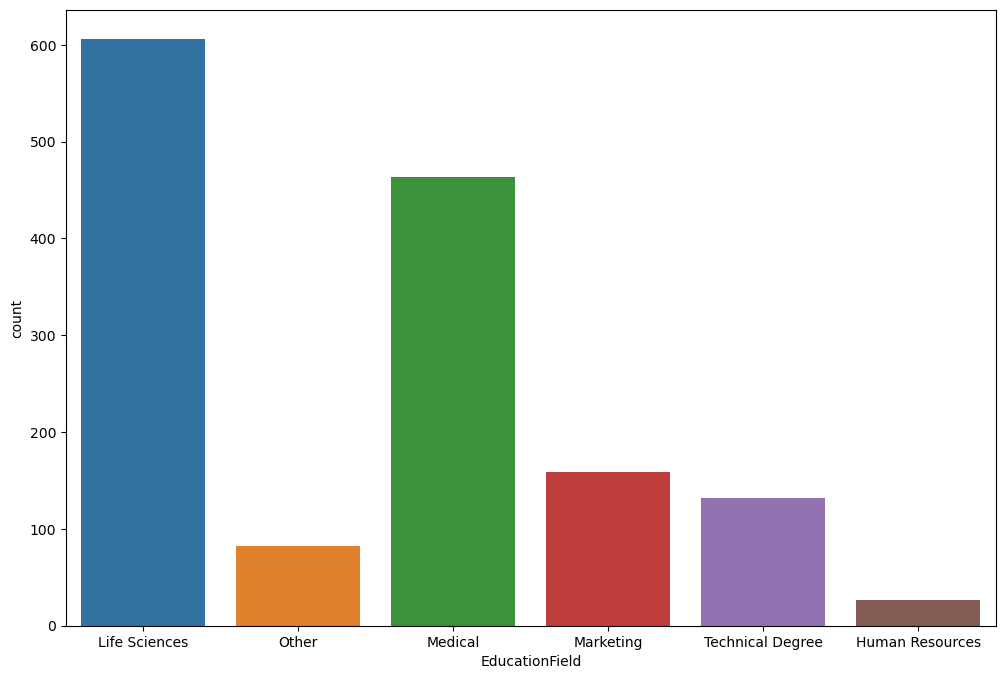

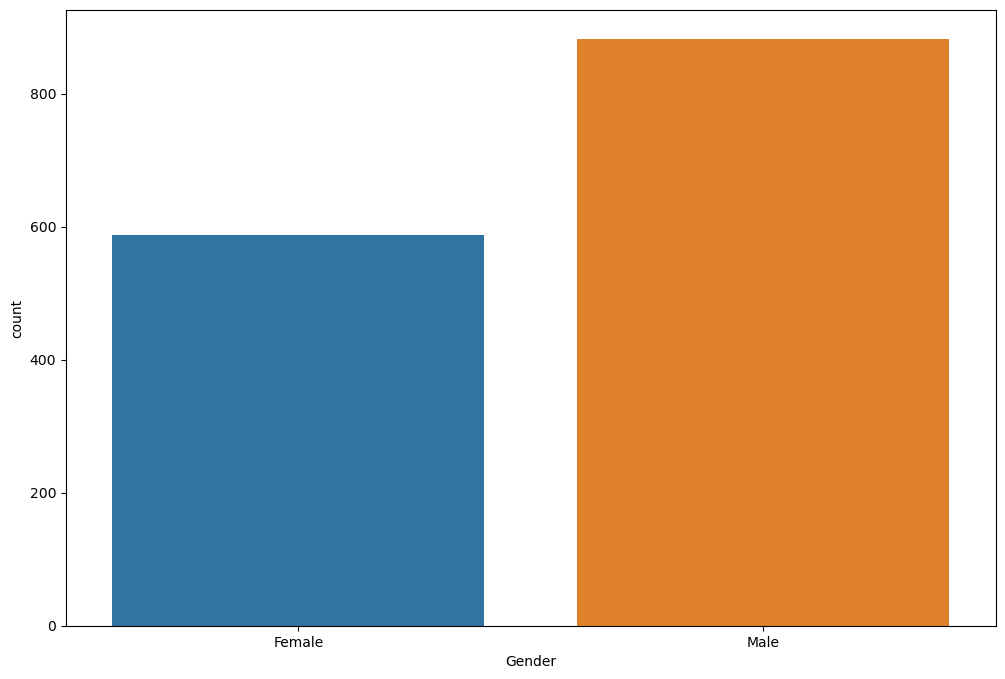

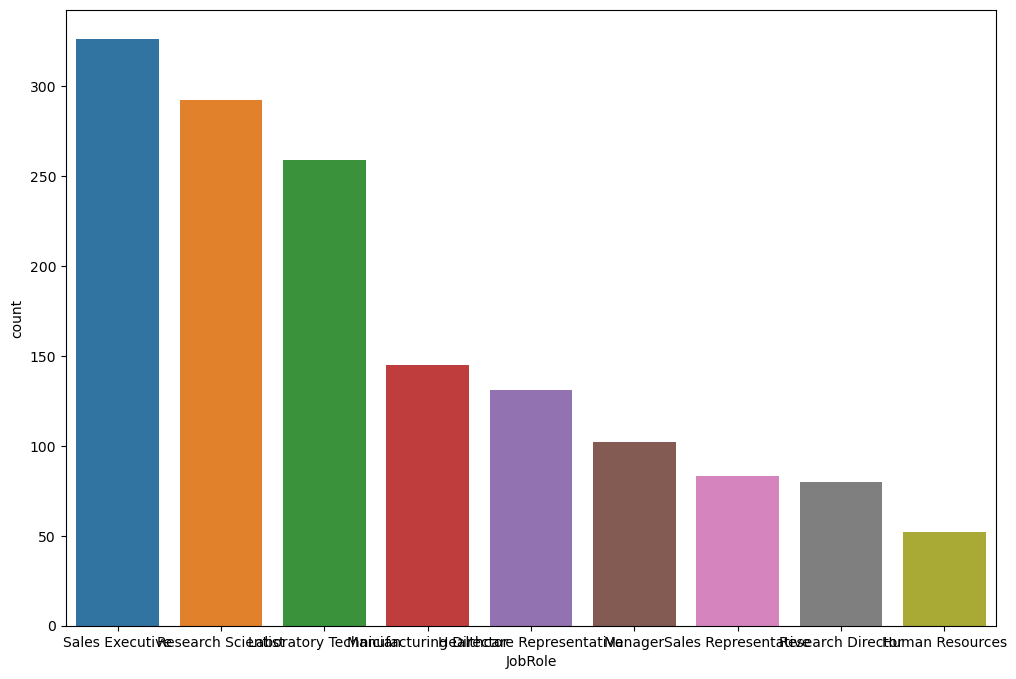

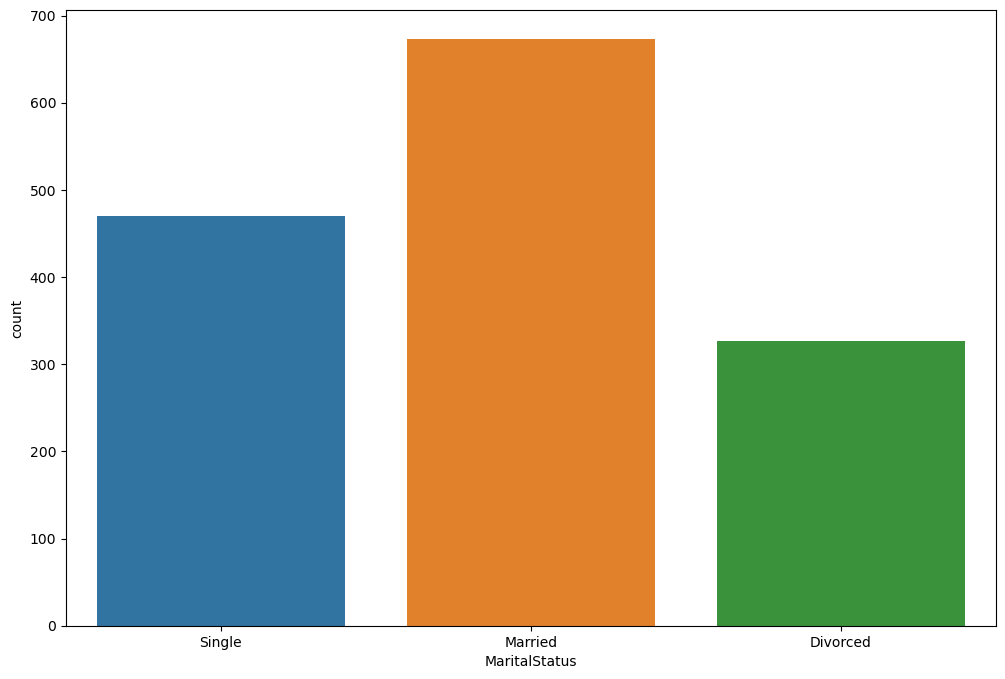

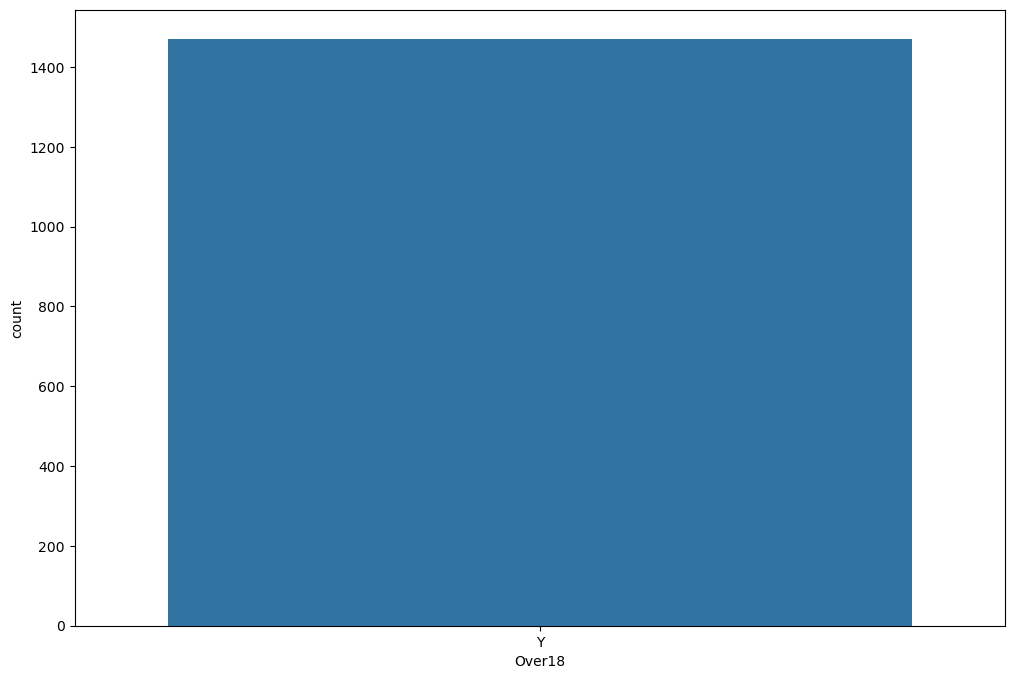

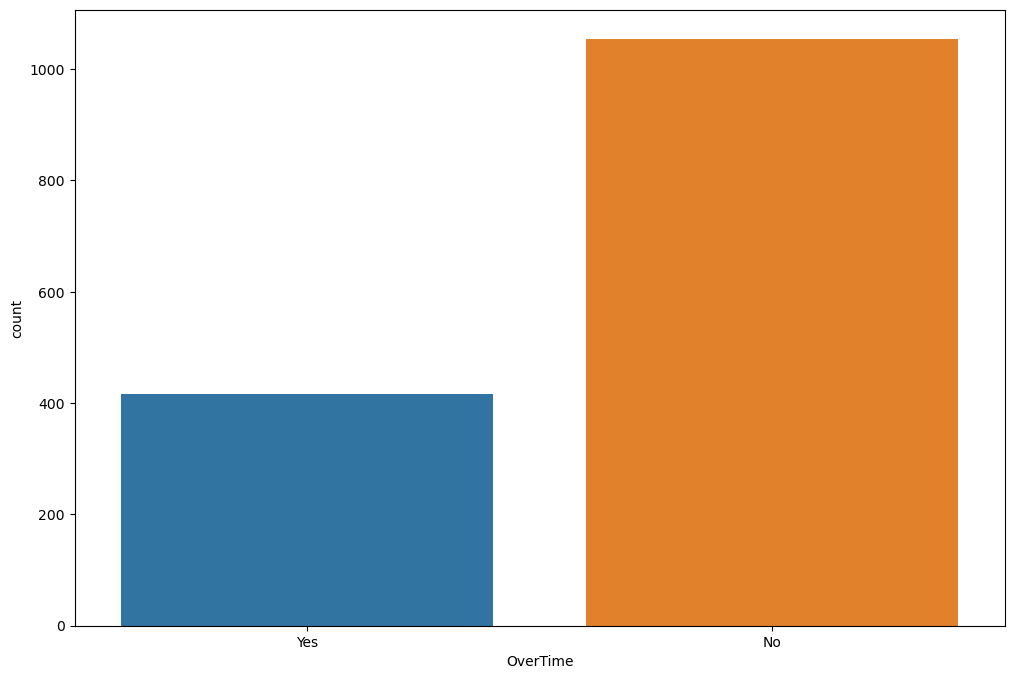

In [17]:
for column in categorical_columns:
    plt.figure(figsize=(12,8))
    sns.countplot(x=project_data[column])
    plt.show()

### Bivariate Analysis

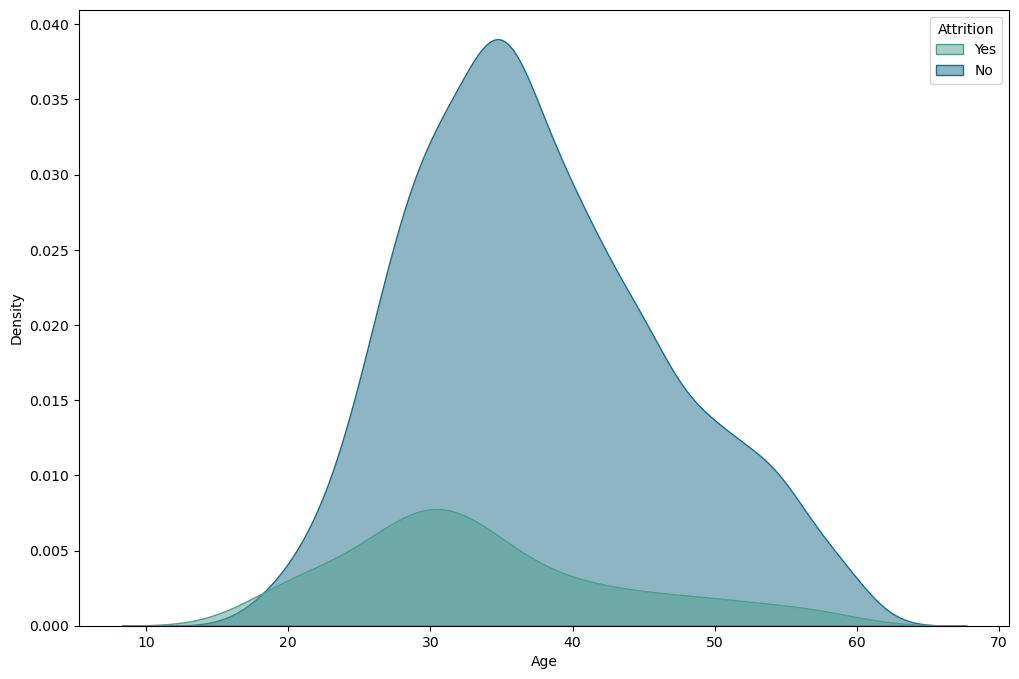

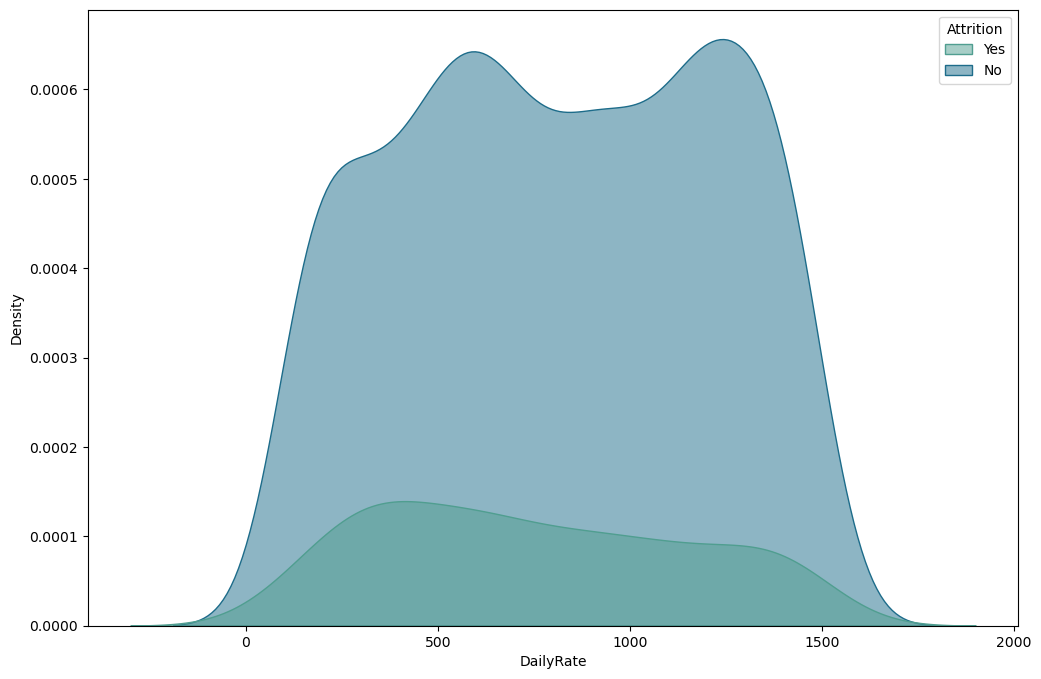

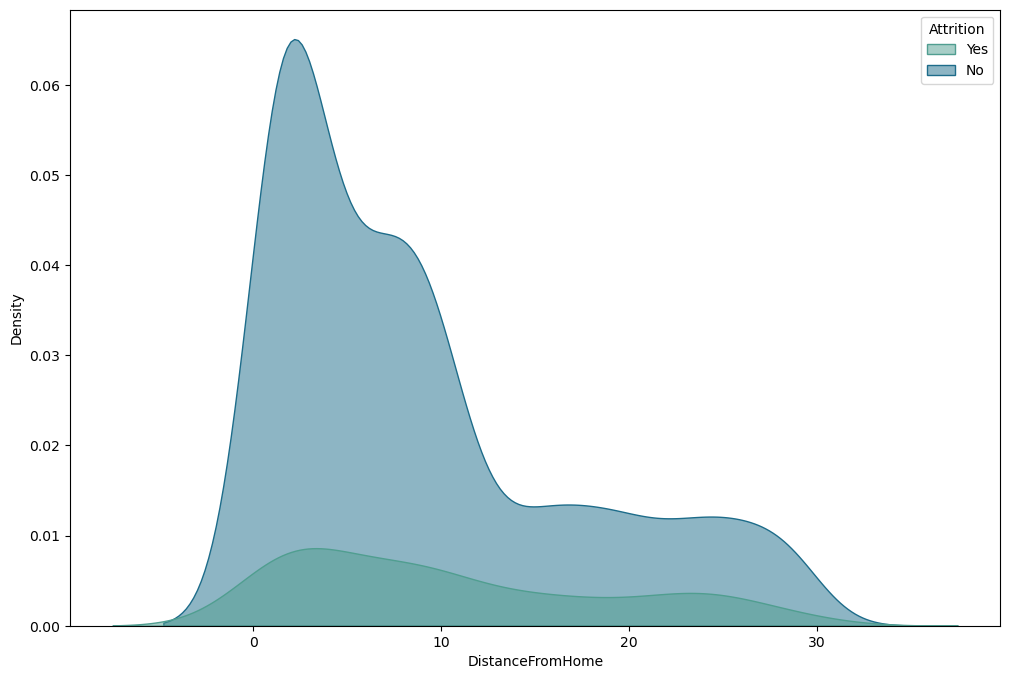

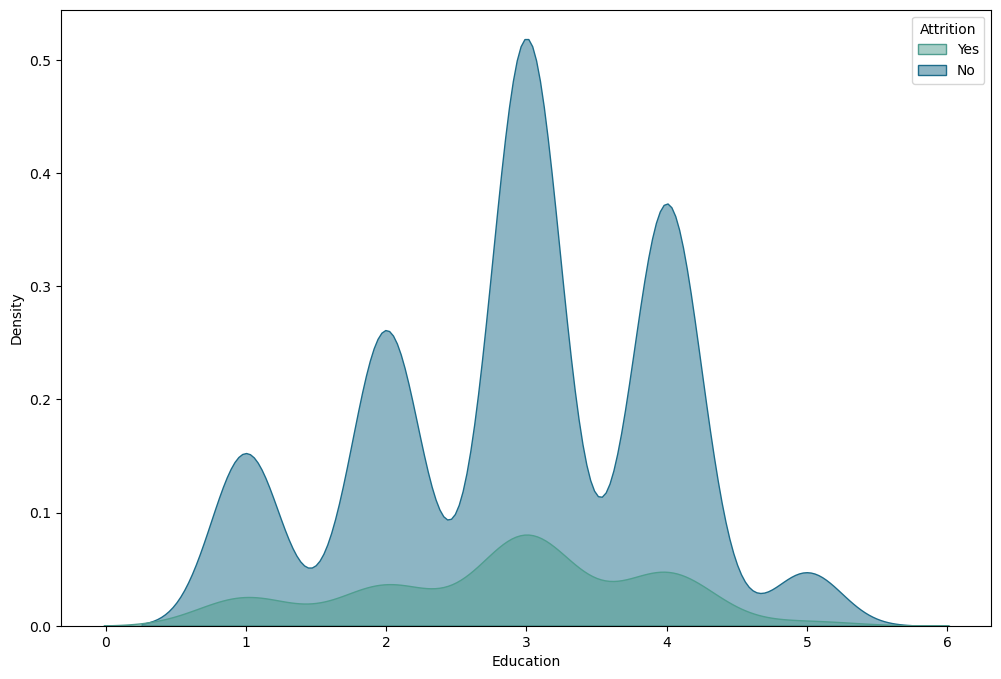

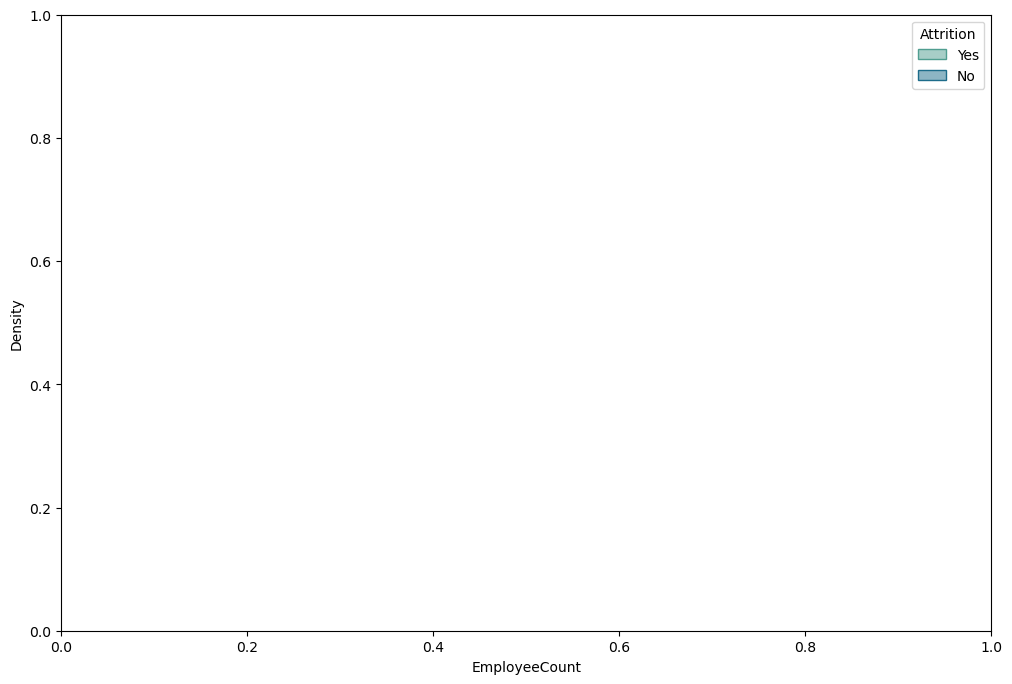

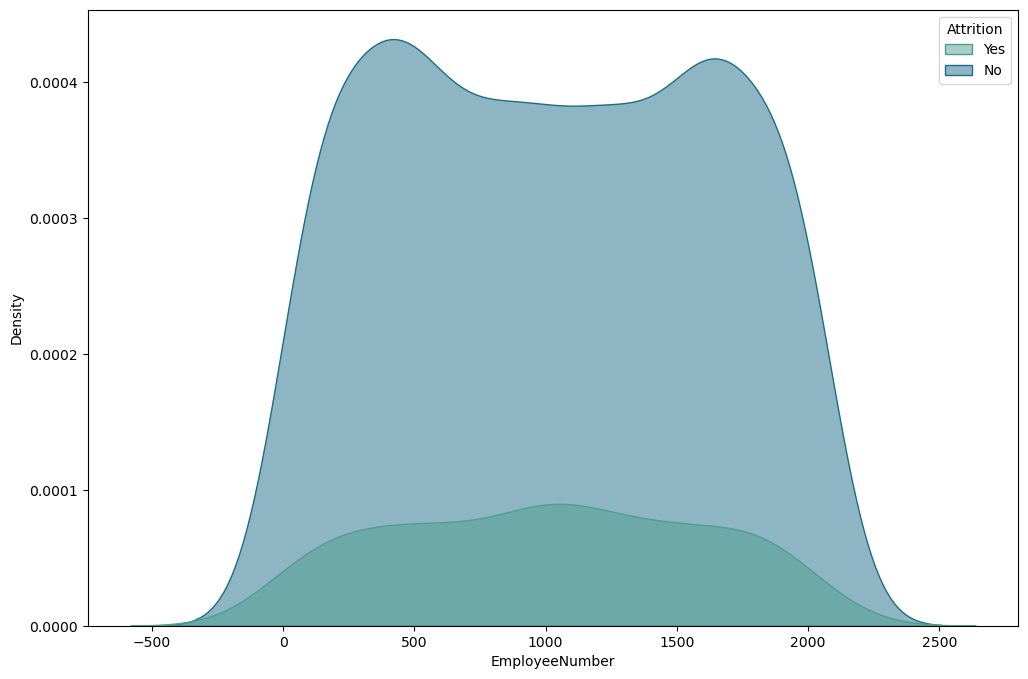

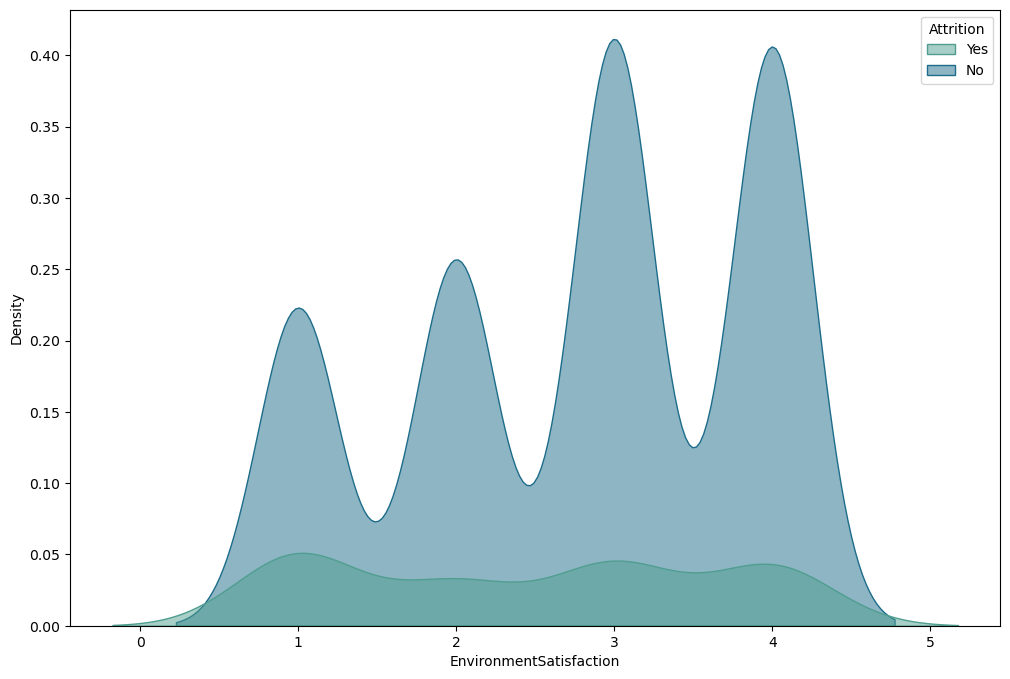

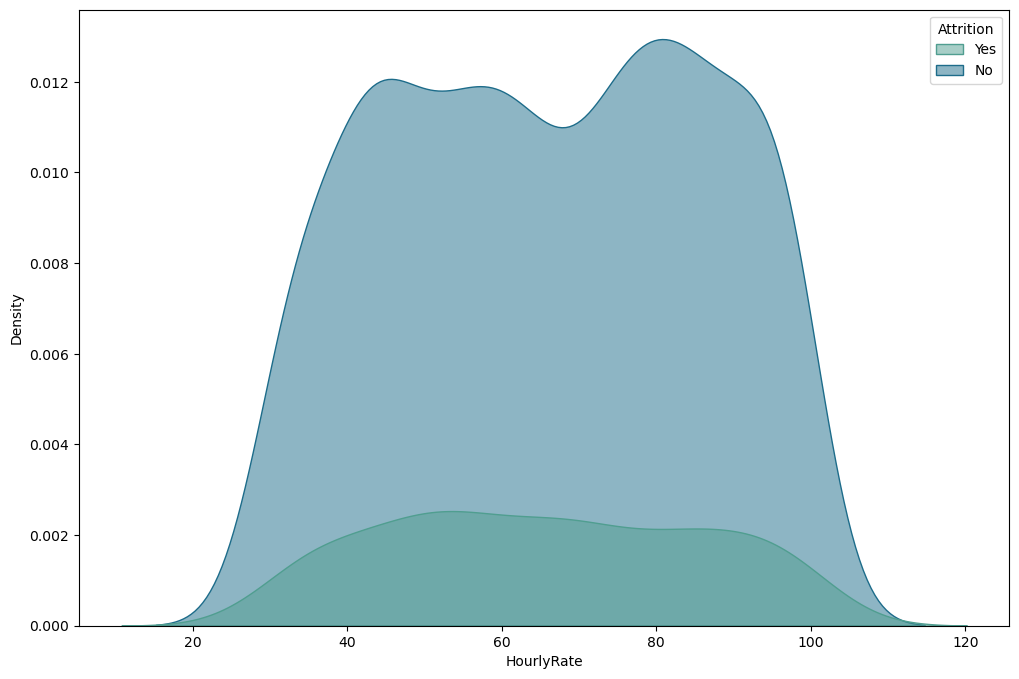

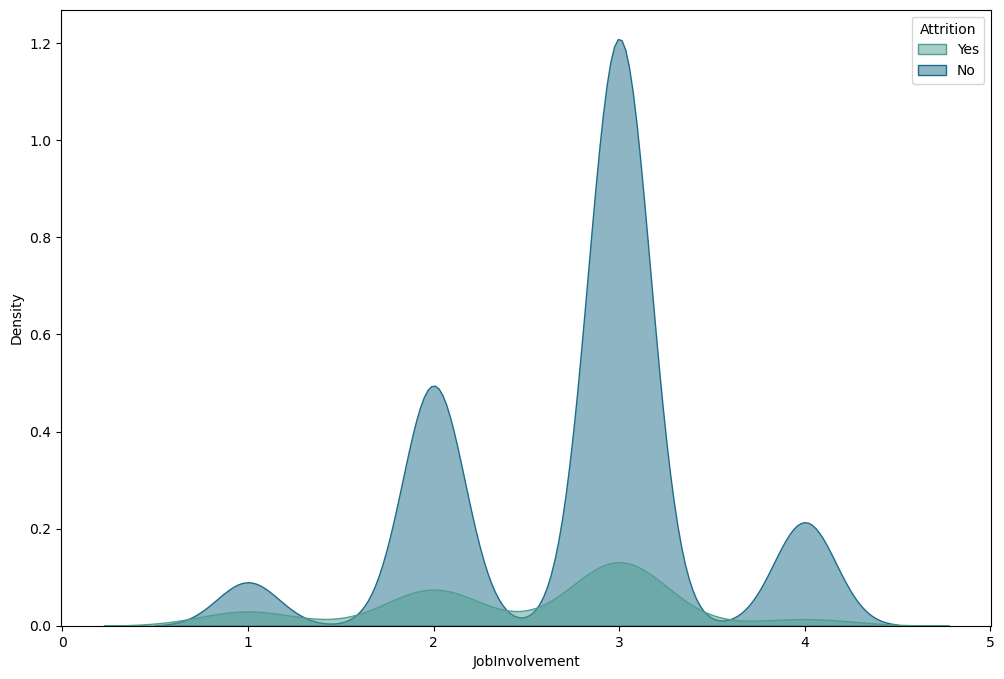

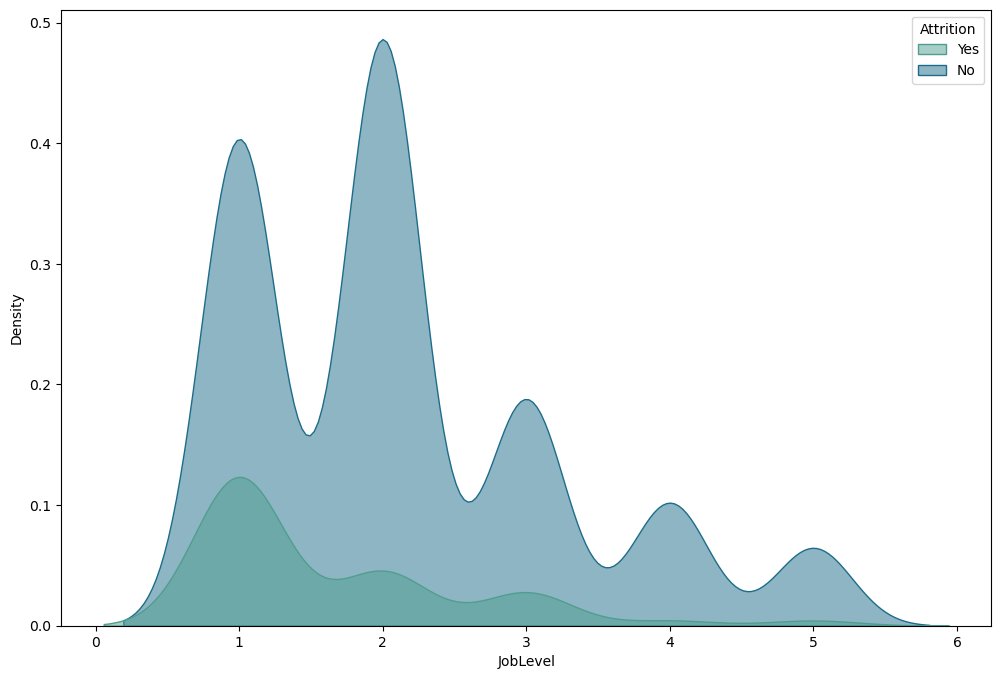

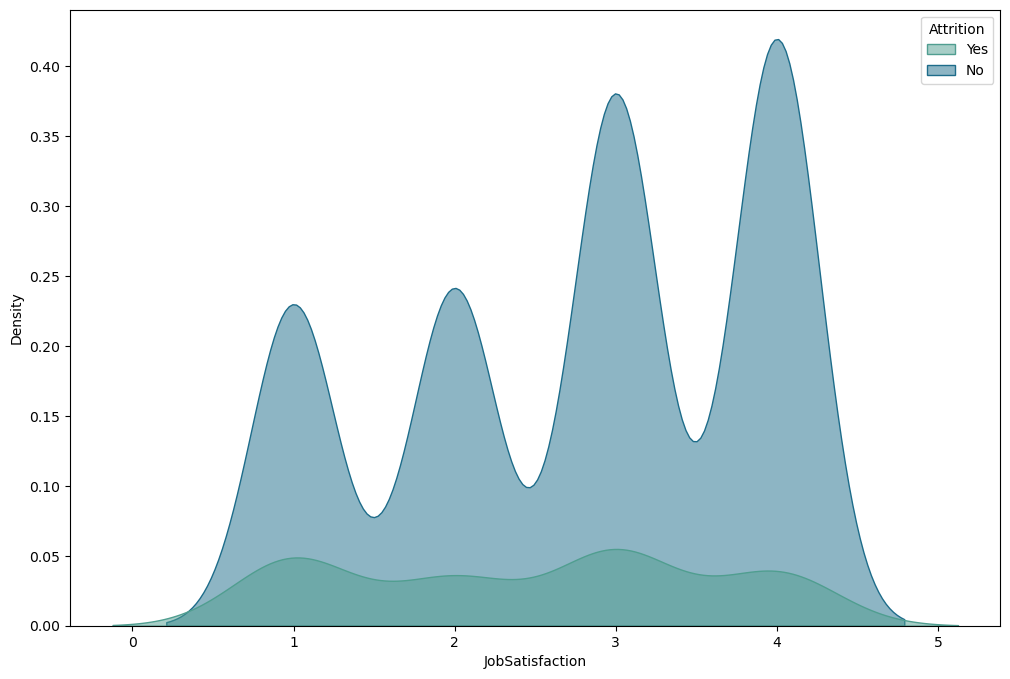

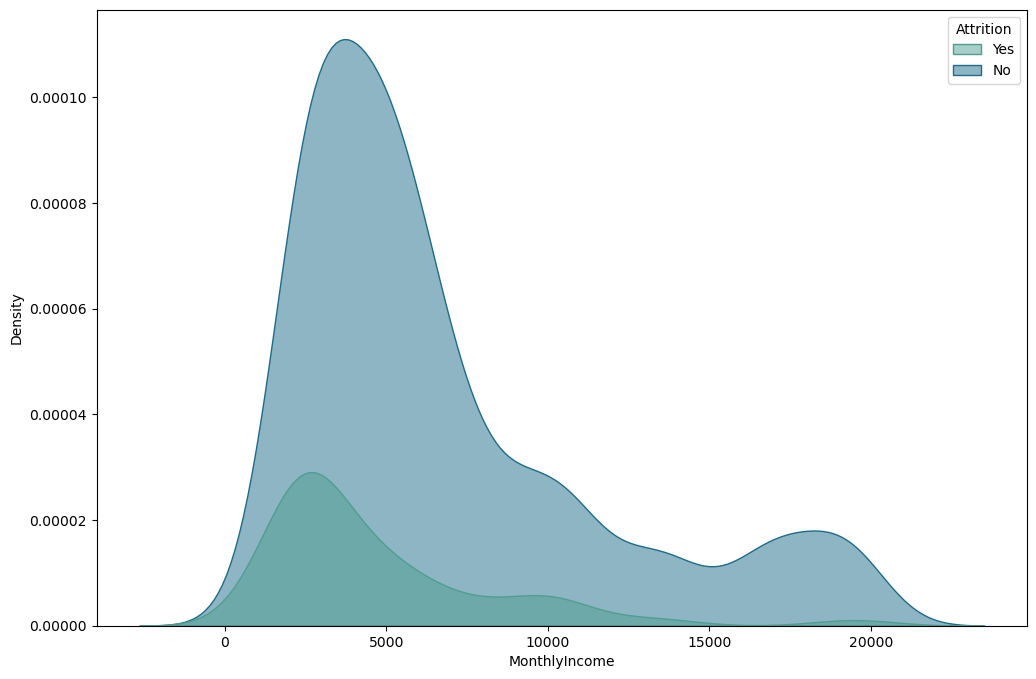

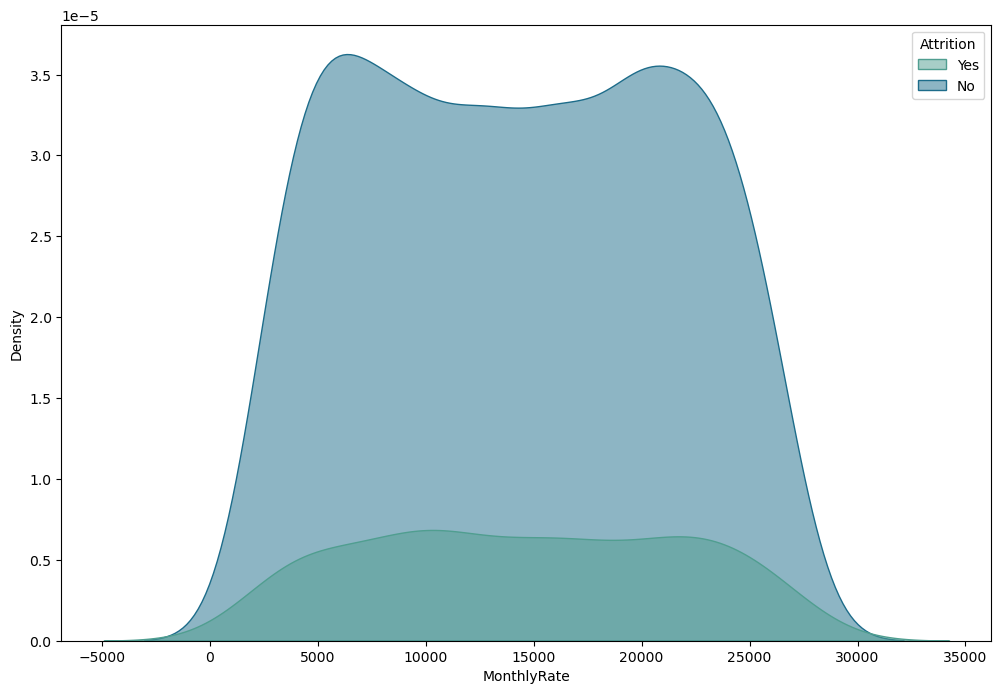

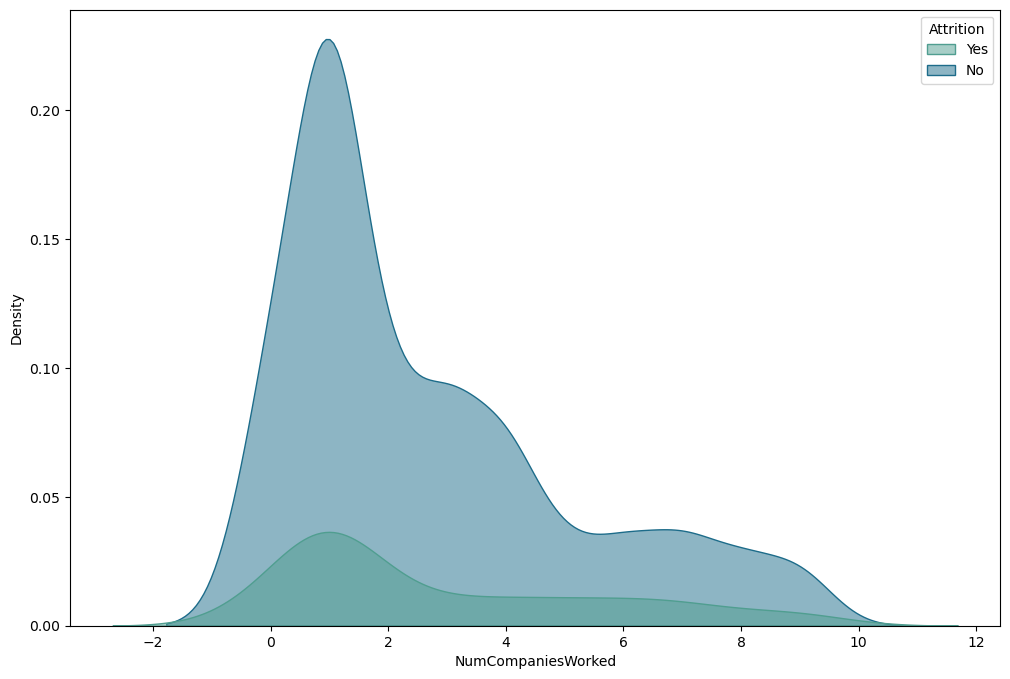

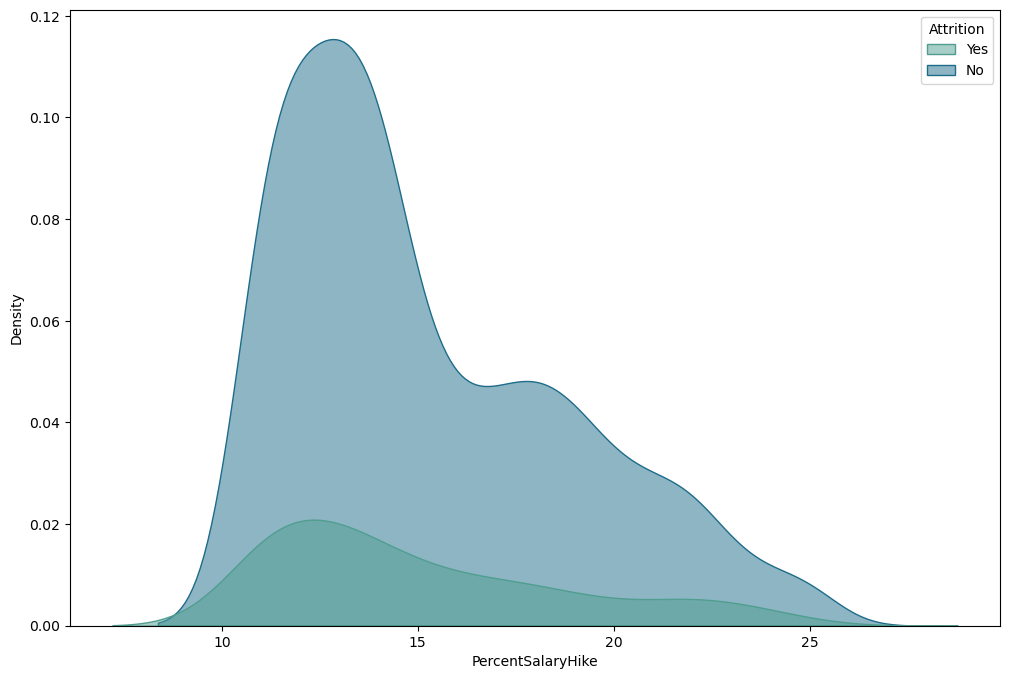

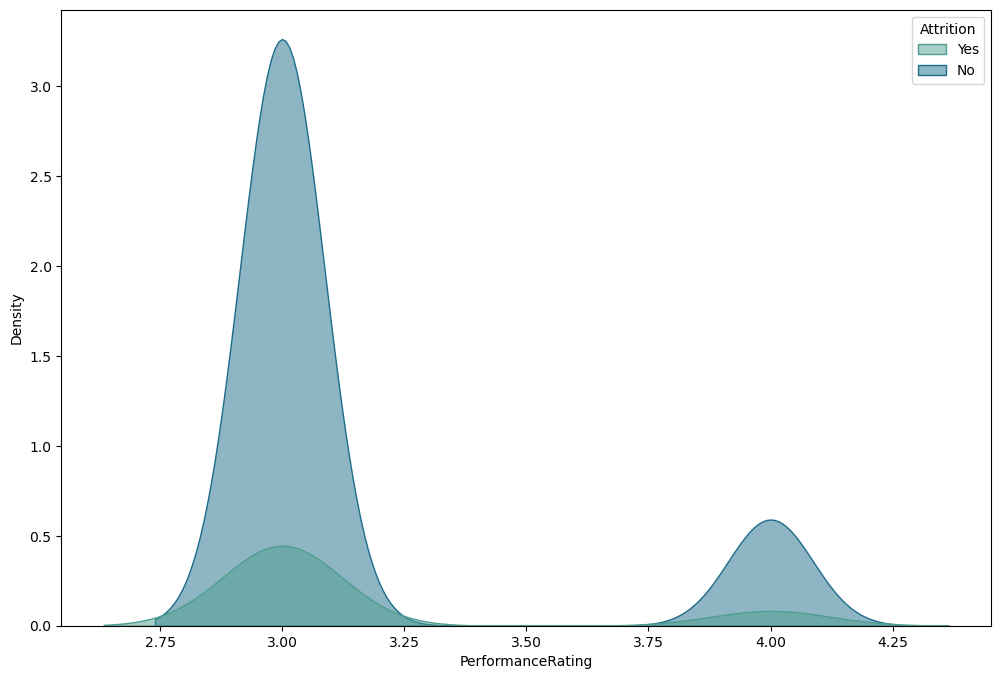

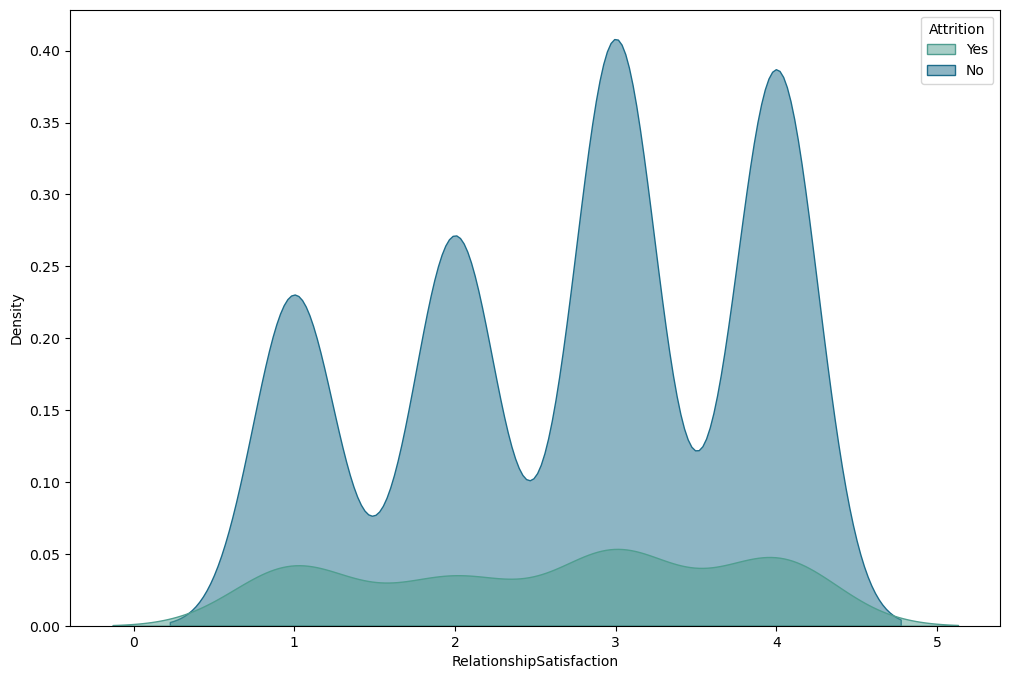

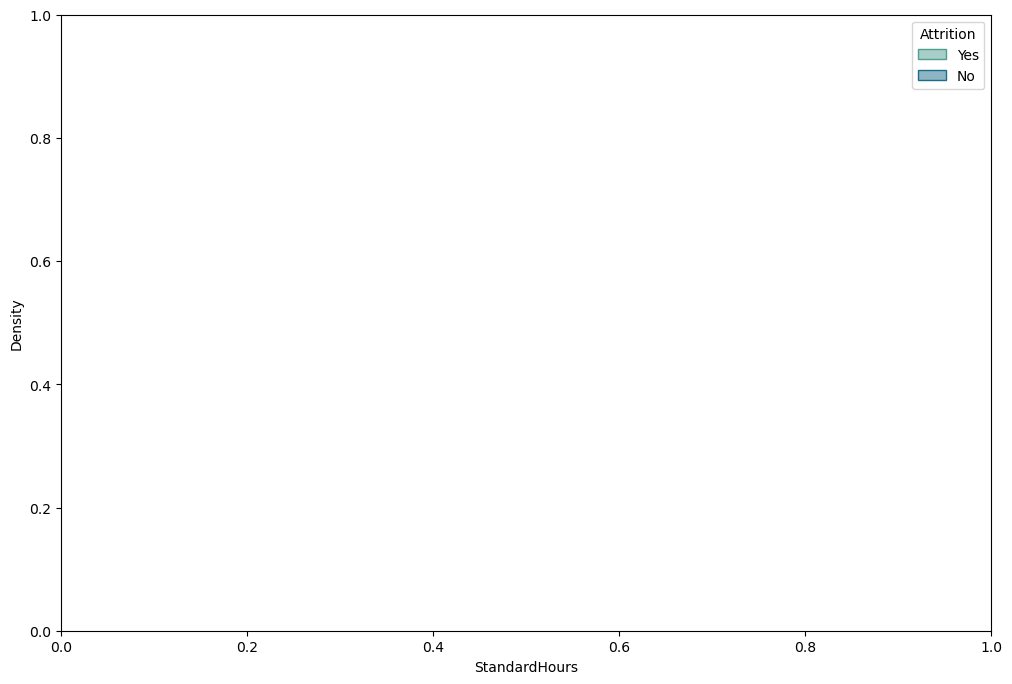

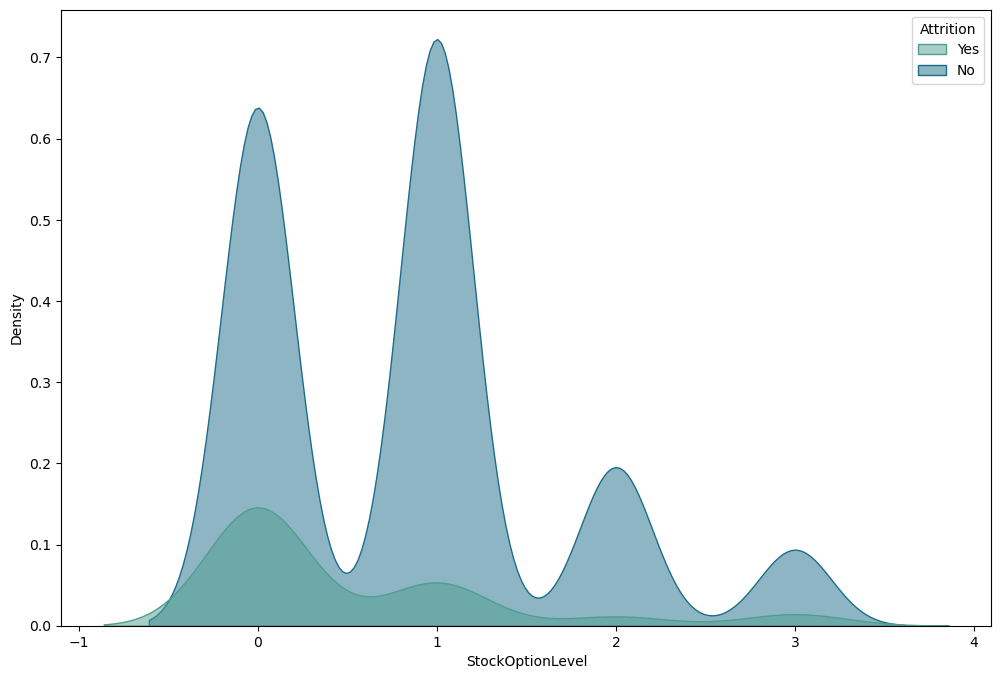

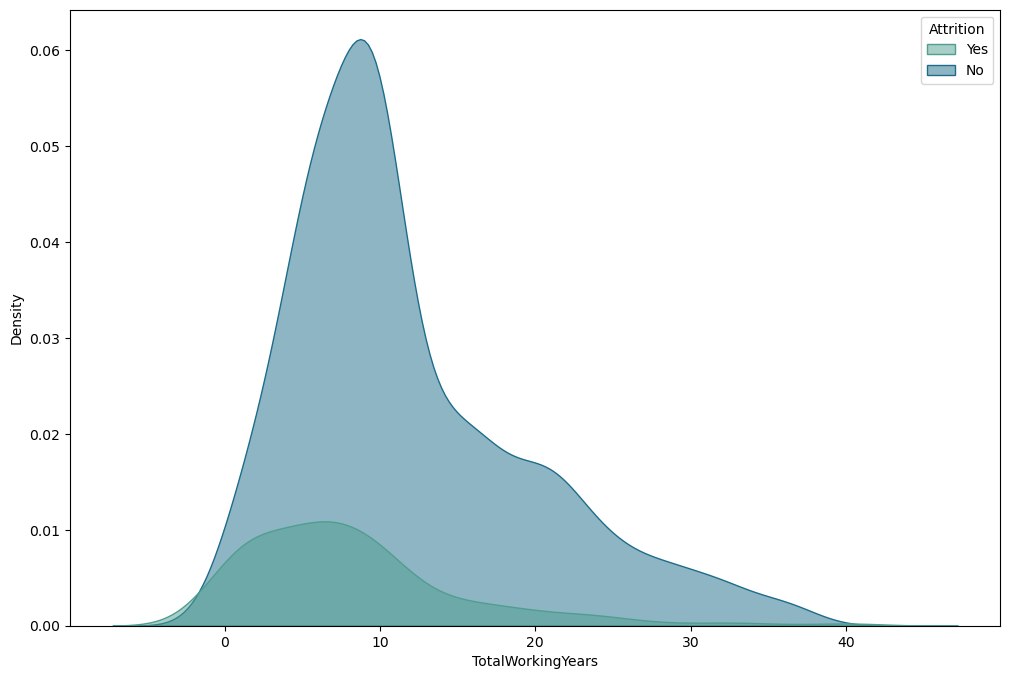

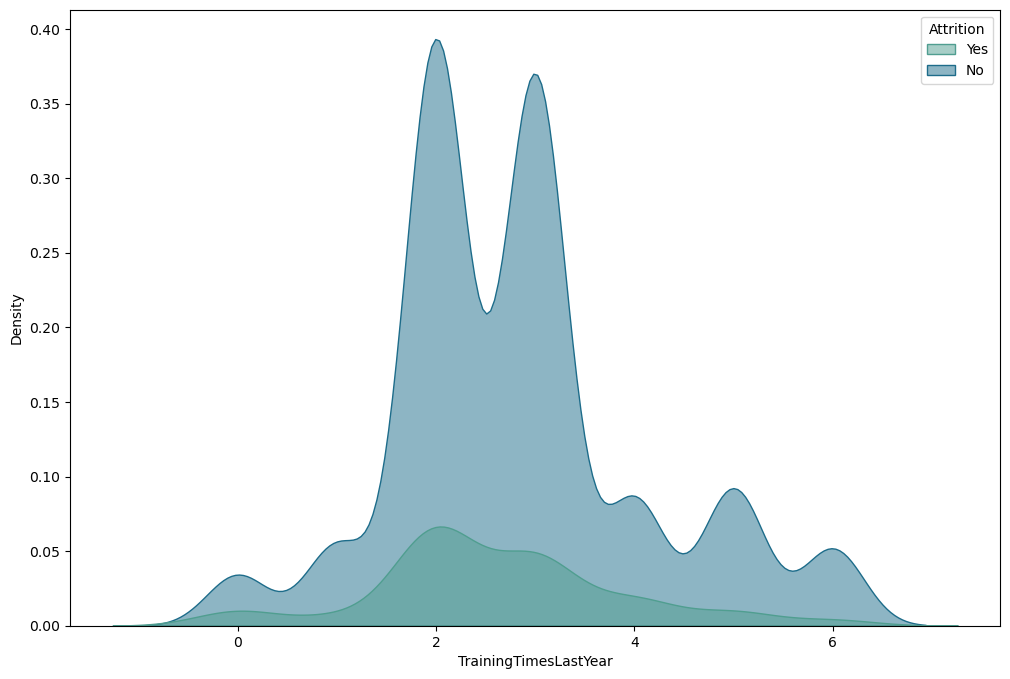

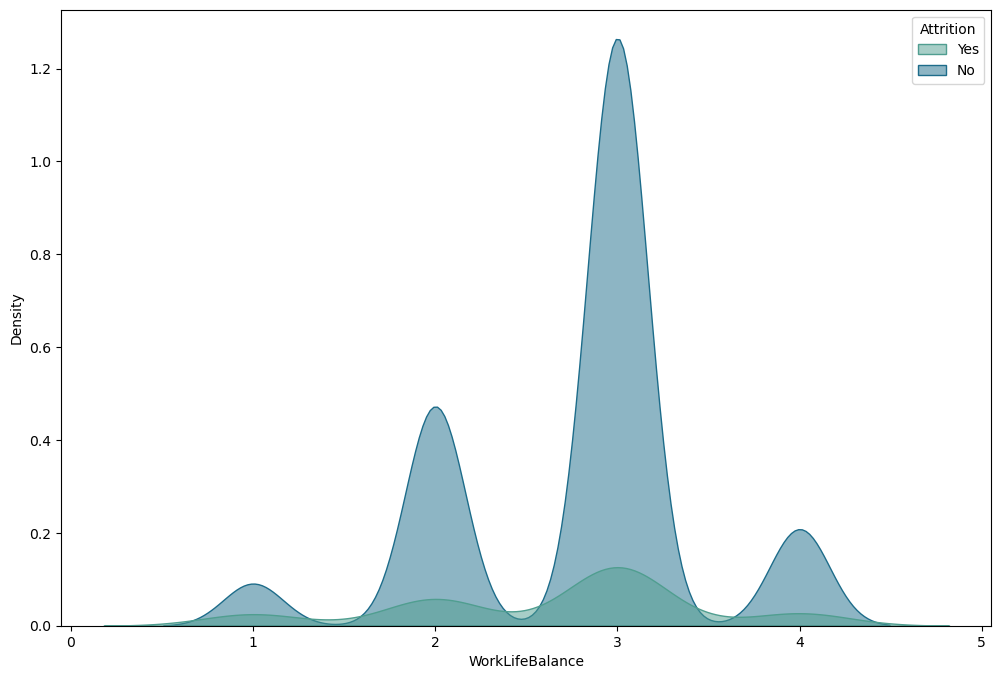

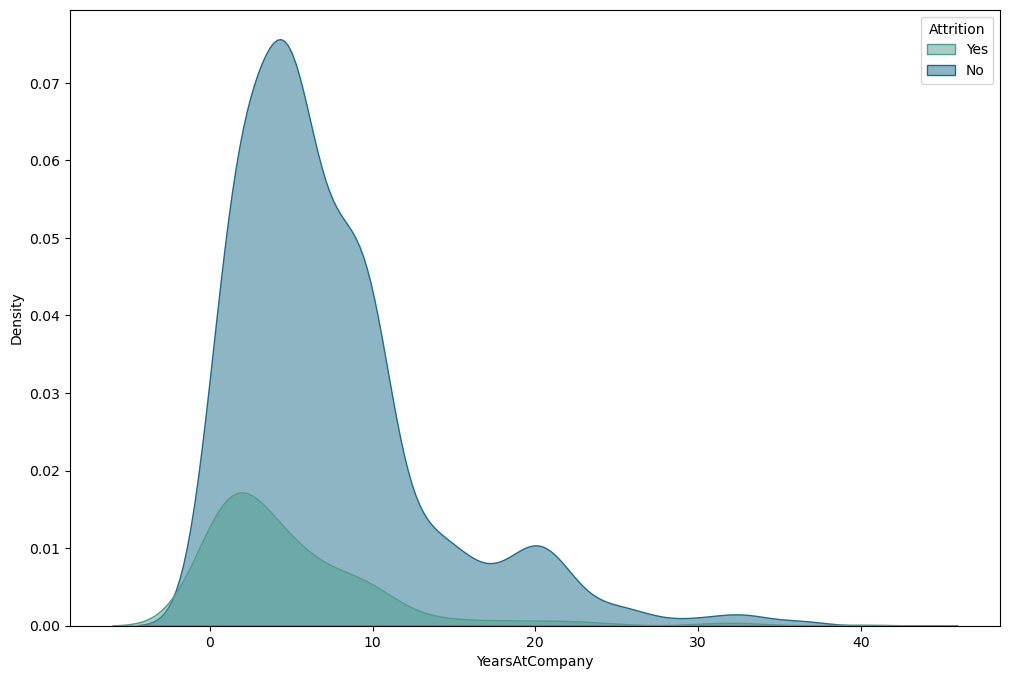

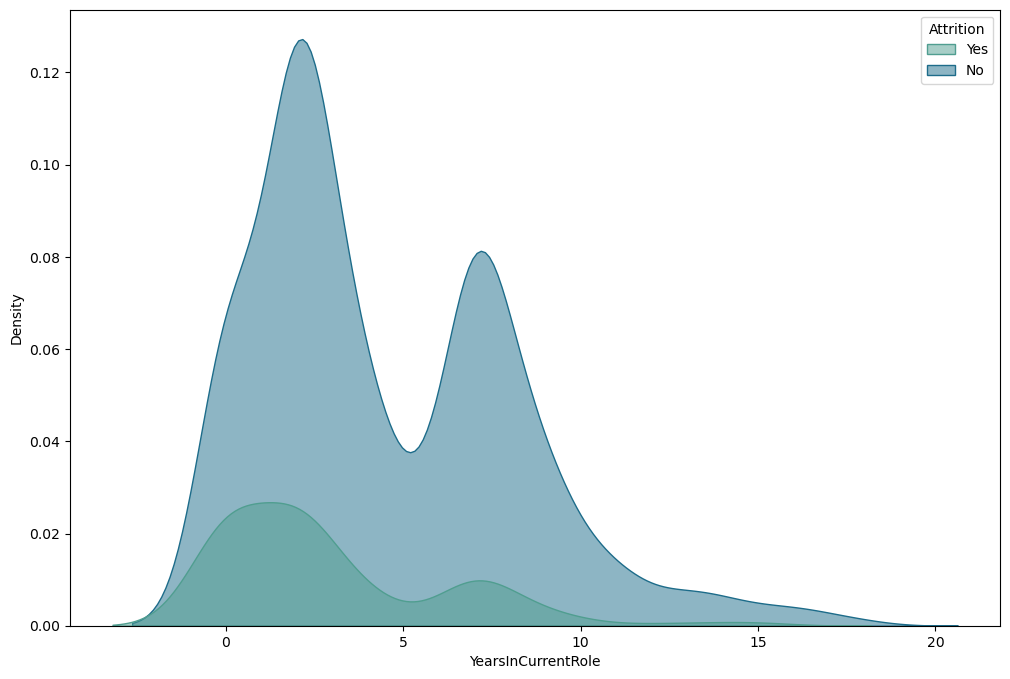

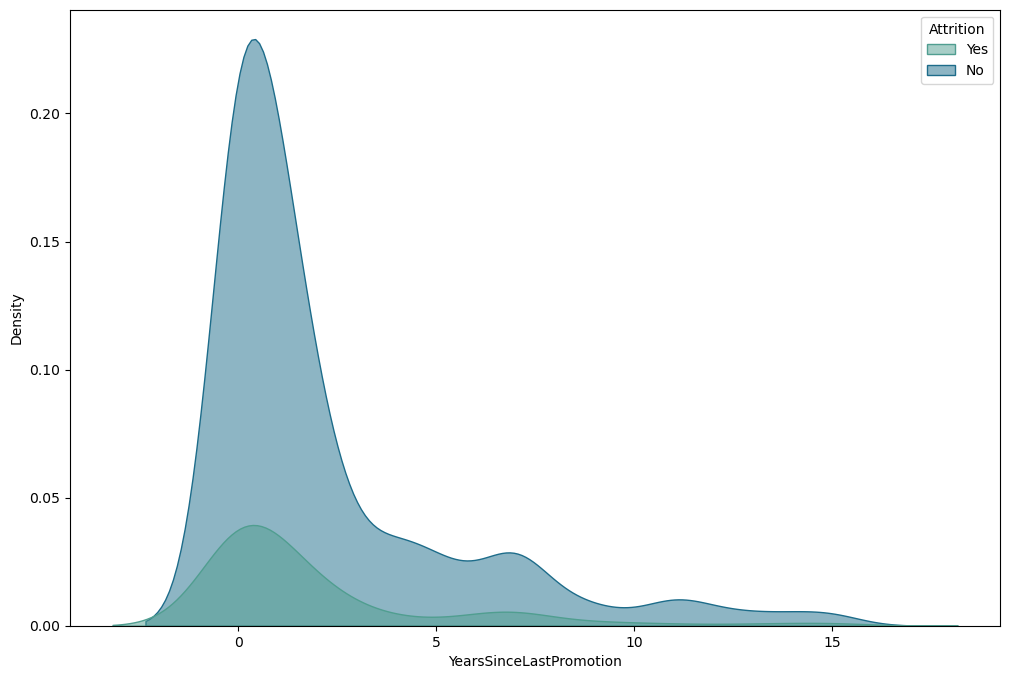

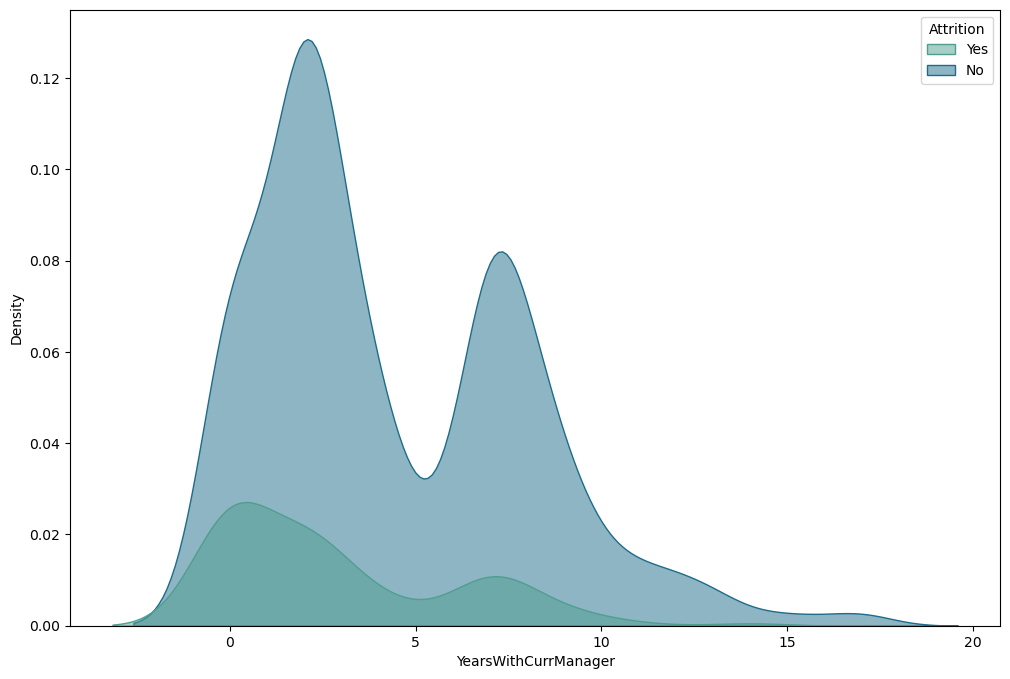

In [18]:
for column in numeric_columns:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=project_data, x=column, hue="Attrition", fill=True, alpha=.5, palette="crest")
    plt.show()

## Correlation Analysis

<Axes: >

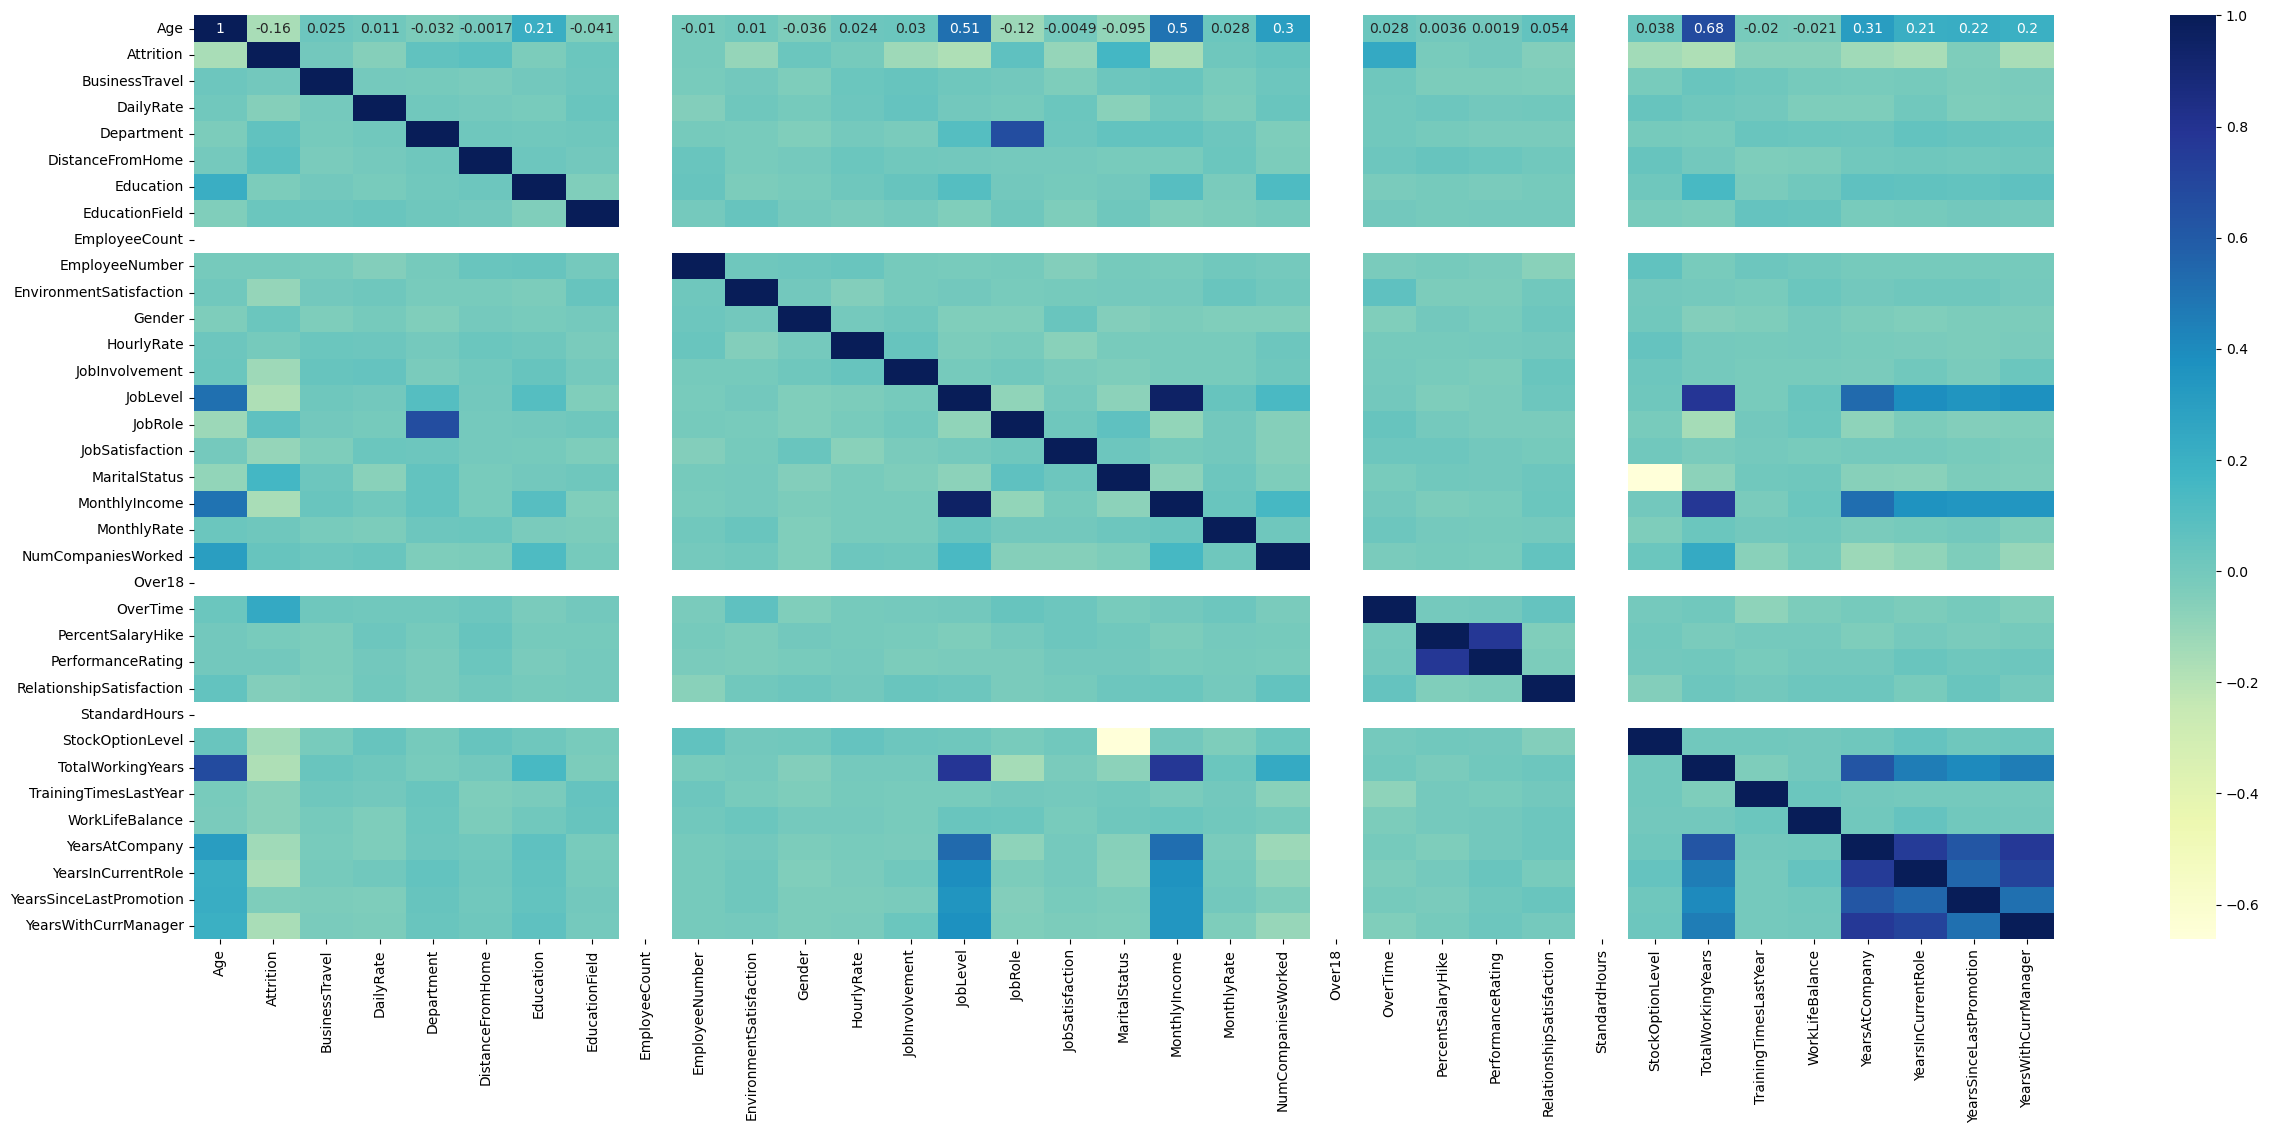

In [19]:
df1 = project_data.copy()

encoder = LabelEncoder()
for column in categorical_columns:
    df1[column] = encoder.fit_transform(df1[column])

plt.figure(figsize=(30,12))
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

## Data Preprocessing and Pipelining

In [20]:
X_train=project_data.drop(columns=["Attrition"])
y_train=project_data["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

In [21]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', y_train.shape)

Train dataset shape: (1029, 34)
Test dataset shape (1029,)


In [22]:
numeric_columns = X_train.select_dtypes(exclude='object').columns
print(numeric_columns)
print('*'*100)
categorical_columns = X_train.select_dtypes(include='object').columns
print(categorical_columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
****************************************************************************************************
Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [23]:
numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])

print(numeric_features)
print('*'*100)

categorical_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

print(categorical_features)

processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns),
    ('categorical', categorical_features, categorical_columns)
])

processing

Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])
****************************************************************************************************
Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRat...
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding', OneHotEncoder()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object'))])

## Generic Methods for Model Preparation & Metric Evaliation

In [24]:
def prepare_model(name, algorithm):
    if algorithm == 'FNN':
        model = Pipeline(steps= [
            ('processing',processing),
            ('pca', TruncatedSVD(n_components=3, random_state=12)),
            ('modeling', create_deep_neural_network(X_train.shape[1]))  # Creating FNN here
        ])
    else:
        model = Pipeline(steps= [
            ('processing',processing),
            ('pca', TruncatedSVD(n_components=3, random_state=12)),
            ('modeling', algorithm)
        ])
    model.fit(X_train, y_train)
    
    # Save
    filename = "Employee Analysis Attrition Report - "+ name +'.pkl'
    print(filename)
    # with open('C:/Users/saray/Documents/FYP Code Workspace/model/1. Employee Analysis Attrition Report', 'wb') as f:
    pickle.dump(model, open(filename, 'wb'))

    return model

In [63]:
# Row 1100 - No
input_data1 = {
    "Age": [40],
    "BusinessTravel": ['Non-Travel'],
    "DailyRate": [1142],
    "Department": ['Research & Development'],
    "DistanceFromHome": [8],
    "Education": [2],
    "EducationField": ['Life Sciences'],
    "EmployeeCount": [1],
    "EmployeeNumber": [1552],
    "EnvironmentSatisfaction": [4],
    "Gender": ['Male'],
    "HourlyRate": [72],
    "JobInvolvement": [3],
    "JobLevel": [2],
    "JobRole": ['Healthcare Representative'],
    "JobSatisfaction": [4],
    "MaritalStatus": ['Divorced'],
    "MonthlyIncome": [4069],
    "MonthlyRate": [8841],
    "NumCompaniesWorked": [3],
    "Over18": ['Y'],
    "OverTime": ['Yes'],
    "PercentSalaryHike": [18],
    "PerformanceRating": [3],
    "RelationshipSatisfaction": [3],
    "StandardHours": [80],
    "StockOptionLevel": [0],
    "TotalWorkingYears": [8],
    "TrainingTimesLastYear": [2],
    "WorkLifeBalance": [3],
    "YearsAtCompany": [2],
    "YearsInCurrentRole": [2],
    "YearsSinceLastPromotion": [2],
    "YearsWithCurrManager": [2]
}

# Row 999 - Yes
input_data2 = {
    "Age": [27],
    "BusinessTravel": ['Travel_Rarely'],
    "DailyRate": [135],
    "Department": ['Research & Development'],
    "DistanceFromHome": [17],
    "Education": [4],
    "EducationField": ['Life Sciences'],
    "EmployeeCount": [1],
    "EmployeeNumber": [1405],
    "EnvironmentSatisfaction": [4],
    "Gender": ['Female'],
    "HourlyRate": [51],
    "JobInvolvement": [3],
    "JobLevel": [2],
    "JobRole": ['Research Scientist'],
    "JobSatisfaction": [3],
    "MaritalStatus": ['Single'],
    "MonthlyIncome": [2394],
    "MonthlyRate": [25681],
    "NumCompaniesWorked": [1],
    "Over18": ['Y'],
    "OverTime": ['Yes'],
    "PercentSalaryHike": [13],
    "PerformanceRating": [3],
    "RelationshipSatisfaction": [4],
    "StandardHours": [80],
    "StockOptionLevel": [0],
    "TotalWorkingYears": [8],
    "TrainingTimesLastYear": [2],
    "WorkLifeBalance": [3],
    "YearsAtCompany": [8],
    "YearsInCurrentRole": [2],
    "YearsSinceLastPromotion": [7],
    "YearsWithCurrManager": [7]
}

# Row 23 - Yes
input_data3 = {
    "Age": [36],
    "BusinessTravel": ['Travel_Rarely'],
    "DailyRate": [1218],
    "Department": ['Sales'],
    "DistanceFromHome": [9],
    "Education": [4],
    "EducationField": ['Life Sciences'],
    "EmployeeCount": [1],
    "EmployeeNumber": [27],
    "EnvironmentSatisfaction": [3],
    "Gender": ['Male'],
    "HourlyRate": [82],
    "JobInvolvement": [2],
    "JobLevel": [1],
    "JobRole": ['Sales Representative'],
    "JobSatisfaction": [1],
    "MaritalStatus": ['Single'],
    "MonthlyIncome": [3407],
    "MonthlyRate": [6986],
    "NumCompaniesWorked": [7],
    "Over18": ['Y'],
    "OverTime": ['No'],
    "PercentSalaryHike": [23],
    "PerformanceRating": [4],
    "RelationshipSatisfaction": [2],
    "StandardHours": [80],
    "StockOptionLevel": [0],
    "TotalWorkingYears": [10],
    "TrainingTimesLastYear": [4],
    "WorkLifeBalance": [3],
    "YearsAtCompany": [5],
    "YearsInCurrentRole": [3],
    "YearsSinceLastPromotion": [0],
    "YearsWithCurrManager": [3]
}

# Row 53 - Yes
input_data4 = {
    "Age": [28],
    "BusinessTravel": ['Travel_Rarely'],
    "DailyRate": [1434],
    "Department": ['Research & Development'],
    "DistanceFromHome": [5],
    "Education": [4],
    "EducationField": ['Technical Degree'],
    "EmployeeCount": [1],
    "EmployeeNumber": [65],
    "EnvironmentSatisfaction": [3],
    "Gender": ['Male'],
    "HourlyRate": [50],
    "JobInvolvement": [3],
    "JobLevel": [1],
    "JobRole": ['Laboratory Technician'],
    "JobSatisfaction": [3],
    "MaritalStatus": ['Single'],
    "MonthlyIncome": [3441],
    "MonthlyRate": [11179],
    "NumCompaniesWorked": [1],
    "Over18": ['Y'],
    "OverTime": ['Yes'],
    "PercentSalaryHike": [13],
    "PerformanceRating": [3],
    "RelationshipSatisfaction": [3],
    "StandardHours": [80],
    "StockOptionLevel": [0],
    "TotalWorkingYears": [2],
    "TrainingTimesLastYear": [3],
    "WorkLifeBalance": [2],
    "YearsAtCompany": [2],
    "YearsInCurrentRole": [2],
    "YearsSinceLastPromotion": [2],
    "YearsWithCurrManager": [2]
}

input_data_df1 = pd.DataFrame(input_data1)
input_data_df2 = pd.DataFrame(input_data2)
input_data_df3 = pd.DataFrame(input_data3)
input_data_df4 = pd.DataFrame(input_data4)

In [64]:
def prepare_confusion_matrix(algo, model):
    print(algo)
    plt.figure(figsize=(12,8))
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 

In [73]:
def prepare_classification_report(algo, model):
    print(algo+' Report :')
#     pred = model.predict(X_test)
#     print(type(input_data_df))
    pred_testrow1 = model.predict(input_data_df1)
    pred_testrow2 = model.predict(input_data_df2)
    pred_testrow3 = model.predict(input_data_df3)
    pred_testrow4 = model.predict(input_data_df4)

#     print(classification_report(y_test, pred))
    print("My predictions: ", pred_testrow1,", ", pred_testrow2,", ", pred_testrow3,", ", pred_testrow4)

In [74]:
def prepare_roc_curve(algo, model):
    print(algo)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    #print(y_test)
    #print(y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()

## Model Preparation

In [75]:
algorithms = [('bagging classifier', BaggingClassifier()), 
              ('KNN classifier', KNeighborsClassifier()), 
              ('Random Forest calssifier', RandomForestClassifier()), 
              ('Adaboost classifier', AdaBoostClassifier()), 
              ('Gradientboost classifier', GradientBoostingClassifier()),
              ('MLP', MLPClassifier())
             ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[0],tup[1])
    model_and_score[tup[0]] = str(model.score(X_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))

Employee Analysis Attrition Report - bagging classifier.pkl
Employee Analysis Attrition Report - KNN classifier.pkl
Employee Analysis Attrition Report - Random Forest calssifier.pkl
Employee Analysis Attrition Report - Adaboost classifier.pkl
Employee Analysis Attrition Report - Gradientboost classifier.pkl
Employee Analysis Attrition Report - MLP.pkl


In [76]:
# FNN Preprocessing
# Transform the training and testing data using the preprocessing steps
X_train_transformed = model.named_steps['processing'].transform(X_train)
X_test_transformed = model.named_steps['processing'].transform(X_test)

# Perform dimensionality reduction using TruncatedSVD
X_train_svd = model.named_steps['pca'].transform(X_train_transformed)
X_test_svd = model.named_steps['pca'].transform(X_test_transformed)

In [77]:
# ChatGpt
# Function to create a simple DL FNN
def create_deep_neural_network(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [78]:
# Train the deep neural network
def train_deep_neural_network(X_train, y_train, X_test, y_test):
    model = create_deep_neural_network(X_train.shape[1])
    # model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))
    
    # Save
    filename = "FNN.pkl"
    print(filename)
    pickle.dump(model, open(filename,'wb'))
    
    # Evaluate performance
    # prediction = model.predict(X_test)
    # accuracy = accuracy_score(y_test, prediction)
    # print("Accuracy:", accuracy)
    # model_and_score['DL'] = str(accuracy*100)+"%"
    # trained_models.append(('DL', model))

    # Evaluate model accuracy
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print("DNN Accuracy:", accuracy)
    
    return model


In [79]:
# Function to create and train deep learning ensemble models

# simple average method, voting method, stacking method

# Train the deep learning ensemble model with different aggregation methods
def train_dl_ensemble(X_train, y_train, X_test, y_test, method='simple_average'):
    # Train individual deep learning models
    models = []
    for i in range(3):  # Train 3 individual models
        model = create_deep_neural_network(X_train.shape[1])
        model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))
        models.append(model)

        # Save the individual models using pickle
        with open(f"model_{method}_{i}.pkl", 'wb') as f:
            pickle.dump(model, f)
    
    # Combine predictions of individual models based on the specified method
    def ensemble_predict(models, X, method):
        if method == 'simple_average':
            return (sum(model.predict(X) for model in models) / len(models)).round().astype(int)
        elif method == 'voting':
            predictions = np.array([model.predict(X) for model in models])
            return np.round(np.mean(predictions, axis=0)).astype(int)
        elif method == 'stacking':
            predictions = np.array([model.predict(X) for model in models])
            meta_X = np.concatenate(predictions, axis=1)
            meta_model = create_deep_neural_network(meta_X.shape[1])
            meta_model.fit(meta_X, y_test, epochs=1, batch_size=32, validation_split=0.2)
            return np.round(meta_model.predict(meta_X)).astype(int)
        else:
            raise ValueError("Invalid ensemble method provided.")
    
    # Evaluate ensemble performance
    ensemble_predictions = ensemble_predict(models, X_test, method)
    ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
    print(f"Ensemble Accuracy ({method}):", ensemble_accuracy)
    model_and_score[f'DL Ensemble ({method})'] = f"{ensemble_accuracy*100:.2f}%"
    trained_models.append((f'DL Ensemble ({method})', models))


    # Save the ensemble method details
    ensemble_details = {
        'method': method,
        'models': models
    }
    with open(f"ensemble_model_{method}.pkl", 'wb') as f:
        pickle.dump(ensemble_details, f)
        
    return models

    # Evaluate ensemble performance - risk of attrition
    # ensemble_predictions = ensemble_predict(models, X_test, method)
    # ensemble_risk = np.mean(ensemble_predictions) * 100  # Convert to percentage scale
    # print(f"Ensemble Risk of Attrition ({method}): {ensemble_risk:.2f}%")
    # return models

In [80]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit label encoder and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print(y_train_encoded)
print(y_test_encoded)

print(y_train_encoded)
print(y_test_encoded)

# Train deep learning models
dl_model = train_deep_neural_network(X_train_svd, y_train_encoded, X_test_svd, y_test_encoded)

# Train deep learning ensemble model
# dl_ensemble_models = train_dl_ensemble(X_train_svd, y_train_encoded, X_test_svd, y_test_encoded)

# Train deep learning ensemble models with different methods
dl_ensemble_models_simple_avg = train_dl_ensemble(X_train_svd, y_train_encoded, X_test_svd, y_test_encoded, method='simple_average')
dl_ensemble_models_voting = train_dl_ensemble(X_train_svd, y_train_encoded, X_test_svd, y_test_encoded, method='voting')
dl_ensemble_models_stacking = train_dl_ensemble(X_train_svd, y_train_encoded, X_test_svd, y_test_encoded, method='stacking')


[0 0 0 ... 0 0 0]
[0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1]
[0 0 0 ... 0 0 0]
[0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 

## Model Evaluation

In [81]:
print(model_and_score)

{'bagging classifier': '97.95918367346938%', 'KNN classifier': '87.26919339164237%', 'Random Forest calssifier': '100.0%', 'Adaboost classifier': '87.07482993197279%', 'Gradientboost classifier': '90.0874635568513%', 'MLP': '85.71428571428571%', 'DL Ensemble (simple_average)': '82.54%', 'DL Ensemble (voting)': '82.54%', 'DL Ensemble (stacking)': '82.54%'}


In [82]:
# for index, tup in enumerate(trained_models):
#     prepare_confusion_matrix(tup[0], tup[1])

In [83]:
for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0], tup[1])
    print("\n")

bagging classifier Report :
My predictions:  ['No'] ,  ['No'] ,  ['Yes'] ,  ['Yes']


KNN classifier Report :
My predictions:  ['No'] ,  ['No'] ,  ['No'] ,  ['Yes']


Random Forest calssifier Report :
My predictions:  ['No'] ,  ['No'] ,  ['Yes'] ,  ['Yes']


Adaboost classifier Report :
My predictions:  ['No'] ,  ['No'] ,  ['No'] ,  ['No']


Gradientboost classifier Report :
My predictions:  ['No'] ,  ['No'] ,  ['No'] ,  ['Yes']


MLP Report :
My predictions:  ['No'] ,  ['No'] ,  ['No'] ,  ['No']


DL Ensemble (simple_average) Report :


AttributeError: 'list' object has no attribute 'predict'

bagging classifier


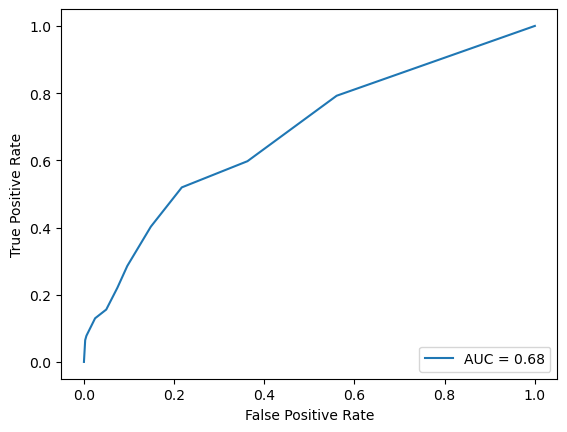

KNN classifier


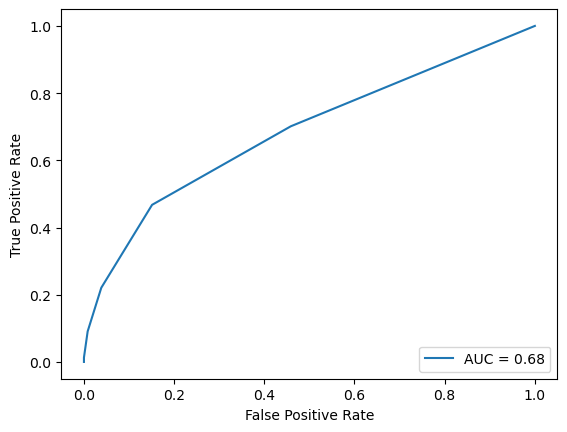

Random Forest calssifier


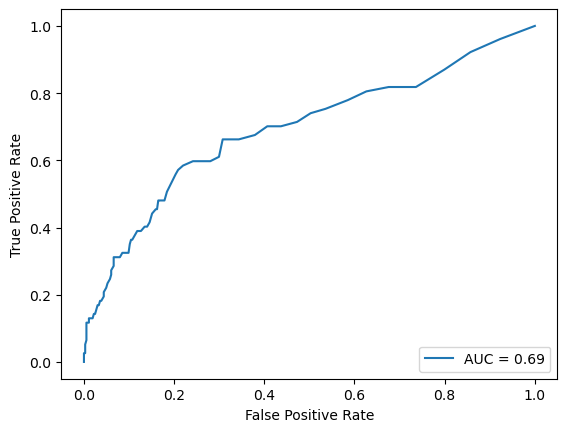

Adaboost classifier


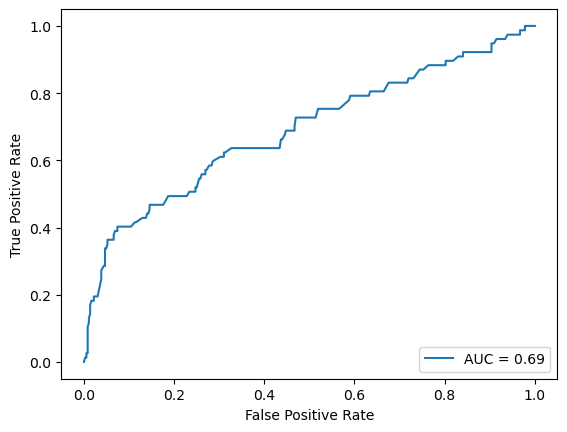

Gradientboost classifier


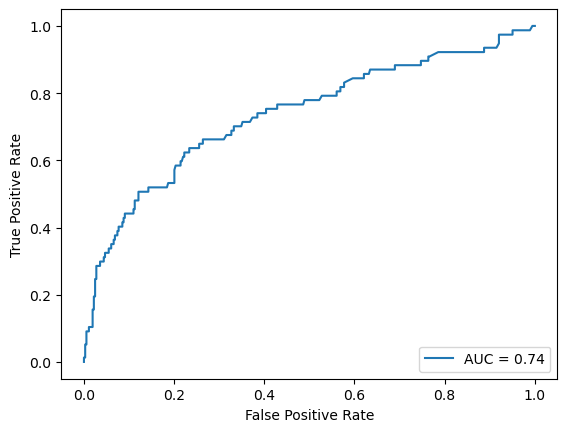

MLP


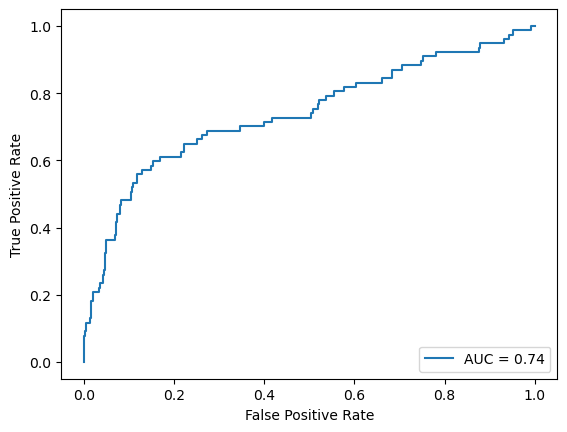

DL Ensemble (simple_average)


AttributeError: 'list' object has no attribute 'predict_proba'

In [84]:
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)

for index, tup in enumerate(trained_models):
    prepare_roc_curve(tup[0], tup[1])

In [ ]:
# Load trained models from pickle files
dl_ensemble_models = []
with open(f"ensemble_model_simple_average.pkl", 'rb') as f:
    dl_ensemble_models.append(pickle.load(f))

with open(f"ensemble_model_stacking.pkl", 'rb') as f:
    dl_ensemble_models.append(pickle.load(f))

with open(f"ensemble_model_voting.pkl", 'rb') as f:
    dl_ensemble_models.append(pickle.load(f))

In [87]:
# Transform input data using preprocessing steps
input_data_transformed1 = processing.transform(input_data_df1)
input_data_svd1 = model.named_steps['pca'].transform(input_data_transformed1)

input_data_transformed2 = processing.transform(input_data_df2)
input_data_svd2 = model.named_steps['pca'].transform(input_data_transformed2)

input_data_transformed3 = processing.transform(input_data_df3)
input_data_svd3 = model.named_steps['pca'].transform(input_data_transformed3)

input_data_transformed4 = processing.transform(input_data_df4)
input_data_svd4 = model.named_steps['pca'].transform(input_data_transformed4)

# Define a function to convert probabilities to Yes/No labels
def convert_to_yes_no(predictions):
    return ["Yes" if pred > 0.5 else "No" for pred in predictions]

# Make predictions using the deep learning ensemble models
ensemble_predictions_simple_avg1 = np.mean([model.predict(input_data_svd1) for model in dl_ensemble_models_simple_avg], axis=0)
ensemble_predictions_simple_avg2 = np.mean([model.predict(input_data_svd2) for model in dl_ensemble_models_simple_avg], axis=0)
ensemble_predictions_simple_avg3 = np.mean([model.predict(input_data_svd3) for model in dl_ensemble_models_simple_avg], axis=0)
ensemble_predictions_simple_avg4 = np.mean([model.predict(input_data_svd4) for model in dl_ensemble_models_simple_avg], axis=0)

ensemble_predictions_voting1 = np.mean([model.predict(input_data_svd1) for model in dl_ensemble_models_voting], axis=0)
ensemble_predictions_voting2 = np.mean([model.predict(input_data_svd2) for model in dl_ensemble_models_voting], axis=0)
ensemble_predictions_voting3 = np.mean([model.predict(input_data_svd3) for model in dl_ensemble_models_voting], axis=0)
ensemble_predictions_voting4 = np.mean([model.predict(input_data_svd4) for model in dl_ensemble_models_voting], axis=0)

ensemble_predictions_stacking1 = np.mean([model.predict(input_data_svd1) for model in dl_ensemble_models_stacking], axis=0)
ensemble_predictions_stacking2 = np.mean([model.predict(input_data_svd2) for model in dl_ensemble_models_stacking], axis=0)
ensemble_predictions_stacking3 = np.mean([model.predict(input_data_svd3) for model in dl_ensemble_models_stacking], axis=0)
ensemble_predictions_stacking4 = np.mean([model.predict(input_data_svd4) for model in dl_ensemble_models_stacking], axis=0)

# Convert ensemble predictions to Yes/No labels
ensemble_labels_simple_avg1 = convert_to_yes_no(ensemble_predictions_simple_avg1)
ensemble_labels_simple_avg2 = convert_to_yes_no(ensemble_predictions_simple_avg2)
ensemble_labels_simple_avg3 = convert_to_yes_no(ensemble_predictions_simple_avg3)
ensemble_labels_simple_avg4 = convert_to_yes_no(ensemble_predictions_simple_avg4)

ensemble_labels_voting1 = convert_to_yes_no(ensemble_predictions_voting1)
ensemble_labels_voting2 = convert_to_yes_no(ensemble_predictions_voting2)
ensemble_labels_voting3 = convert_to_yes_no(ensemble_predictions_voting3)
ensemble_labels_voting4 = convert_to_yes_no(ensemble_predictions_voting4)

ensemble_labels_stacking1 = convert_to_yes_no(ensemble_predictions_stacking1)
ensemble_labels_stacking2 = convert_to_yes_no(ensemble_predictions_stacking2)
ensemble_labels_stacking3 = convert_to_yes_no(ensemble_predictions_stacking3)
ensemble_labels_stacking4 = convert_to_yes_no(ensemble_predictions_stacking4)

# Display the predictions
print("Predictions for input_data1:")
print("Simple Average Ensemble:", ensemble_labels_simple_avg1," Chance of Leaving: ", ensemble_predictions_simple_avg1)
print("Voting Ensemble:", ensemble_labels_voting1," Chance of Leaving: ", ensemble_predictions_voting1)
print("Stacking Ensemble:", ensemble_labels_stacking1," Chance of Leaving: ", ensemble_predictions_stacking1)

print("\nPredictions for input_data2:")
print("Simple Average Ensemble:", ensemble_labels_simple_avg2," Chance of Leaving: ", ensemble_predictions_simple_avg2)
print("Voting Ensemble:", ensemble_labels_voting2," Chance of Leaving: ", ensemble_predictions_voting2)
print("Stacking Ensemble:", ensemble_labels_stacking2," Chance of Leaving: ", ensemble_predictions_stacking2)

print("\nPredictions for input_data3:")
print("Simple Average Ensemble:", ensemble_labels_simple_avg3," Chance of Leaving: ", ensemble_predictions_simple_avg3)
print("Voting Ensemble:", ensemble_labels_voting3," Chance of Leaving: ", ensemble_predictions_voting3)
print("Stacking Ensemble:", ensemble_labels_stacking3," Chance of Leaving: ", ensemble_predictions_stacking3)

print("\nPredictions for input_data4:")
print("Simple Average Ensemble:", ensemble_labels_simple_avg4," Chance of Leaving: ", ensemble_predictions_simple_avg4)
print("Voting Ensemble:", ensemble_labels_voting4," Chance of Leaving: ", ensemble_predictions_voting4)
print("Stacking Ensemble:", ensemble_labels_stacking4," Chance of Leaving: ", ensemble_predictions_stacking4)


1/1 [==============================] - 0s 15ms/step
Predictions for input_data1:
Simple Average Ensemble: ['No']  Chance of Leaving:  [[0.1619816]]
Voting Ensemble: ['No']  Chance of Leaving:  [[0.16721193]]
Stacking Ensemble: ['No']  Chance of Leaving:  [[0.16447864]]

Predictions for input_data2:
Simple Average Ensemble: ['No']  Chance of Leaving:  [[0.14102848]]
Voting Ensemble: ['No']  Chance of Leaving:  [[0.14260885]]
Stacking Ensemble: ['No']  Chance of Leaving:  [[0.14291038]]

Predictions for input_data3:
Simple Average Ensemble: ['No']  Chance of Leaving:  [[0.2061156]]
Voting Ensemble: ['No']  Chance of Leaving:  [[0.23653609]]
Stacking Ensemble: ['No']  Chance of Leaving:  [[0.2169265]]

Predictions for input_data4:
Simple Average Ensemble: ['No']  Chance of Leaving:  [[0.19750512]]
Voting Ensemble: ['No']  Chance of Leaving:  [[0.20213461]]
Stacking Ensemble: ['No']  Chance of Leaving:  [[0.19782396]]
